# 1_overall_evluation_vllm

In [ ]:
# CUDA_VISIBLE_DEVICES=5 python evaluation_vllm.py --model_name /ratio_5_3e-5/checkpoint-2016  --gpu_memory_utilization 0.4 --data_len 100


INFO 02-03 16:11:19 llm_engine.py:72] Initializing an LLM engine with config: model='../Models/overall_history_concise_1/checkpoint-1152', tokenizer='../Models/overall_history_concise_1/checkpoint-1152', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, seed=0)
INFO 02-03 16:11:56 llm_engine.py:207] # GPU blocks: 4727, # CPU blocks: 512


Processed prompts: 100%|██████████| 30200/30200 [1:03:31<00:00,  7.92it/s]


0 jaccard: 0.2632, recall: 0.2941, precision: 0.7143, f1: 0.4167, ddi_rate: 0.0476, drug_num: 7.00/151, drug_num_gt: 17.00/151,refuse_rate: 0.0000
10 jaccard: 0.3203, recall: 0.3769, precision: 0.7609, f1: 0.4751, ddi_rate: 0.1168, drug_num: 13.45/151, drug_num_gt: 26.64/151,refuse_rate: 0.0000
20 jaccard: 0.3061, recall: 0.3540, precision: 0.7518, f1: 0.4588, ddi_rate: 0.1120, drug_num: 11.43/151, drug_num_gt: 23.95/151,refuse_rate: 0.0000
30 jaccard: 0.2900, recall: 0.3382, precision: 0.7289, f1: 0.4413, ddi_rate: 0.1136, drug_num: 11.35/151, drug_num_gt: 24.42/151,refuse_rate: 0.0000
40 jaccard: 0.2949, recall: 0.3463, precision: 0.6994, f1: 0.4400, ddi_rate: 0.1116, drug_num: 11.68/151, drug_num_gt: 23.95/151,refuse_rate: 0.0000
50 jaccard: 0.2940, recall: 0.3444, precision: 0.7084, f1: 0.4405, ddi_rate: 0.1068, drug_num: 11.41/151, drug_num_gt: 23.76/151,refuse_rate: 0.0000
60 jaccard: 0.2925, recall: 0.3480, precision: 0.6961, f1: 0.4400, ddi_rate: 0.1036, drug_num: 11.61/151, dr

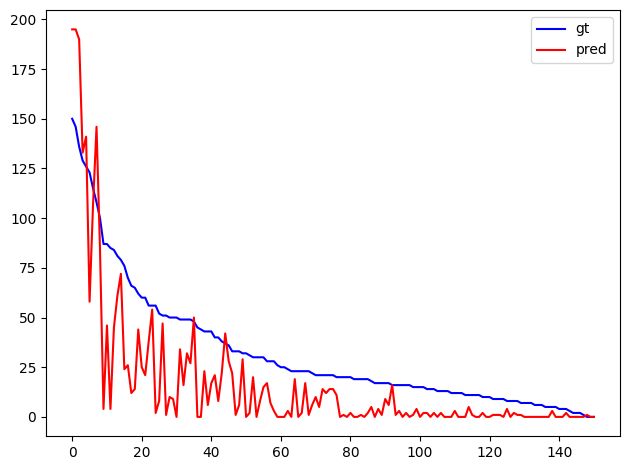

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '5'
from _1_overall_evaluation_vllm import overall_evaluation_vllm

for lora_path in ["../output/lora_0_151/checkpoint-704"]:
    overall_evaluation_vllm(lora_path, gpu_memory_utilization=0.63, data_len=200, base_model='llama-2-7b')

# 2_each_drug_evluation_vllm

In [ ]:
!CUDA_VISIBLE_DEVICES=5 nohup python _2_each_drug_evaluation_vllm.py --lora_path ../output/lora_0_151_ratio_4/checkpoint-1408 --test_med_list None --gpu_memory_utilization 0.8 --start_idx 120  --end_idx 151 --data_len -1 --base_model llama-2-7b --file_name data4LLM_CONCISE_NOTE.csv > nohup3.out 2> nohup3.err &

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from _2_each_drug_evaluation_vllm import each_drug_evaluation_vllm

test_med_list = ['Mirtazapine']

for model_name in ["../output/select_drug_Mirtazapine/finetune_results/141_checkpoint_Mirtazapine_0.1161-544"]:
    each_drug_evaluation_vllm(model_name, test_med_list, gpu_memory_utilization=0.9, 
                              data_len=-1, vllm=True, remove_model=True, base_model='llama-2-7b', use_note=False, 
                              file_name='data4LLM_CONCISE_NOTE.csv')

------ Single drug evaluation: Merging lora weights and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/sds/cxfan/anaconda3/envs/qwen/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Test data size: 2368

INFO 02-04 18:46:47 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/select_drug_Mirtazapine/finetune_results/141_checkpoint_Mirtazapine_0.1161-544', tokenizer='../Models/select_drug_Mirtazapine/finetune_results/141_checkpoint_Mirtazapine_0.1161-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 18:47:11 llm_engine.py:275] # GPU blocks: 7296, # CPU blocks: 512
INFO 02-04 18:47:13 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 18:47:13 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasi

Processed prompts: 100%|██████████| 2368/2368 [01:41<00:00, 23.41it/s]
2024-02-04 18:49:01,858 - INFO - 141-Mirtazapine             , recall:0.3187  precision:0.6905  f1:0.4361  jaccard:0.2788  drug_pred:42/2368, drug_gt:91


jaccard: 0.2788
len(jaccard_list): 1
jaccard_list: [0.27884615384615385]


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from _2_each_drug_evaluation_vllm import each_drug_evaluation_vllm

# list dir path
result_path = '../output/each_drug_55_100/finetune_results/'
dir_paths = os.listdir(result_path)
dir_paths = sorted(dir_paths)
for dir_path in dir_paths:
    test_med_list = [dir_path.split('_')[2]]
    model_name = result_path + dir_path
    each_drug_evaluation_vllm(model_name, test_med_list, gpu_memory_utilization=0.5, 
                              data_len=-1, vllm=True, remove_model=False, base_model='llama-2-7b', 
                              file_name='data4LLM_CONCISE_TITLE.csv')

INFO 12-11 22:35:45 llm_engine.py:72] Initializing an LLM engine with config: model='../Models/each_drug_55_100/finetune_results/55_checkpoint_Ceftriaxone_0.2345-1152', tokenizer='../Models/each_drug_55_100/finetune_results/55_checkpoint_Ceftriaxone_0.2345-1152', tokenizer_mode=auto, revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, seed=0)
INFO 12-11 22:36:09 llm_engine.py:205] # GPU blocks: 3407, # CPU blocks: 512


Processed prompts: 100%|██████████| 2421/2421 [01:32<00:00, 26.23it/s]


['No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'Yes.', 'Yes.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'Yes.', 'Yes.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'No.', 'Yes.', 'N

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO 12-11 22:38:55 llm_engine.py:72] Initializing an LLM engine with config: model='../Models/each_drug_55_100/finetune_results/56_checkpoint_Trazodone_0.1310-1', tokenizer='../Models/each_drug_55_100/finetune_results/56_checkpoint_Trazodone_0.1310-1', tokenizer_mode=auto, revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, seed=0)
INFO 12-11 22:39:15 llm_engine.py:205] # GPU blocks: 3407, # CPU blocks: 512


Processed prompts: 100%|██████████| 2421/2421 [01:42<00:00, 23.60it/s] 


['###Answer:', "###Current Clinical Condition: '''\n\nAge: ", '<Yes.> or <No.> without providing an explanation.', '###Explanation:', 'Yes.', 'Yes.', '<Yes.> or <No.>', '###Explanation:', '###Current Clinical Condition:\n\nAge: 3', "Yes.\n\n'''\n###Explanation:\n\nTra", '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '<Yes.> or <No.> without providing an explanation.', '<Yes.> or <No.>', '<Yes.> or <No.>', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Answer:\n\n###Answer:\n\n###Answer', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', '<Yes.> or <No.> without providing an explanation.', '###Explanation:', 'Y

# 3_each_lora_evluation_vllm
给151个lora的结果进行评估

In [ ]:
!CUDA_VISIBLE_DEVICES=6 nohup python _3_each_lora_evaluation_vllm.py --run_name each_drug_short_linear_v1 --gpu_memory_utilization 0.9 --file_name data4LLM_CONCISE_TITLE.csv --template_name llama-2-7b_copy > each_drug_short_linear_v1.out 2>&1  &

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

from _3_each_lora_evaluation_vllm import each_lora_evaluation_vllm

gpu_memory_utilization = 0.9
base_model = "llama-2-7b"
run_name = "each_drug_note_v3_without_disease"

each_lora_evaluation_vllm(run_name, gpu_memory_utilization, vllm=True, mode='test', 
                          use_history=True, 
                          use_note=True,
                          use_disease=False,
                          use_procedure=True,
                          file_name='data4LLM_CONCISE_NOTE.csv',
                          base_model=base_model,
                          )

Test data size: 2368

{'Phenylephrine': '32_checkpoint_Phenylephrine_0.4924-640', 'Diltiazem': '69_checkpoint_Diltiazem_0.3906-1056', 'Azithromycin': '110_checkpoint_Azithromycin_0.2105-1056', 'Captopril': '83_checkpoint_Captopril_0.1985-448', 'Metoprolol': '3_checkpoint_Metoprolol_0.7179-512', 'Octreotide': '139_checkpoint_Octreotide_0.5923-800', 'Phylloquinone': '57_checkpoint_Phylloquinone_0.2936-768', 'Tetracosactide': '97_checkpoint_Tetracosactide_0.1329-416', 'Calcium gluconate': '17_checkpoint_Calcium gluconate_0.2949-352', 'Prednisone': '37_checkpoint_Prednisone_0.6485-704', 'Hydrochlorothiazide': '124_checkpoint_Hydrochlorothiazide_0.4821-416', 'Oxycodone': '8_checkpoint_Oxycodone_0.5905-320', 'Omeprazole': '42_checkpoint_Omeprazole_0.3982-160', 'Dolasetron': '96_checkpoint_Dolasetron_0.1111-768', 'Sodium bicarbonate': '38_checkpoint_Sodium bicarbonate_0.3427-1472', 'Cefazolin': '58_checkpoint_Cefazolin_0.3692-544', 'Metoclopramide': '33_checkpoint_Metoclopramide_0.5540-832', 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 1-Potassium chloride, model_path: ../Models/each_drug_note_v3_without_disease/1_checkpoint_Potassium chloride_0.7367-352 ------
INFO 02-04 19:48:57 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/1_checkpoint_Potassium chloride_0.7367-352', tokenizer='../Models/each_drug_note_v3_without_disease/1_checkpoint_Potassium chloride_0.7367-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 19:49:27 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 19:49:27 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 19:49:27 model_ru

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.08it/s]


------ Evaluating 2-Pantoprazole, model_path: ../Models/each_drug_note_v3_without_disease/2_checkpoint_Pantoprazole_0.6063-512 ------
INFO 02-04 19:51:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/2_checkpoint_Pantoprazole_0.6063-512', tokenizer='../Models/each_drug_note_v3_without_disease/2_checkpoint_Pantoprazole_0.6063-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 19:51:51 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 19:51:51 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 19:51:51 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 3-Metoprolol, model_path: ../Models/each_drug_note_v3_without_disease/3_checkpoint_Metoprolol_0.7179-512 ------
INFO 02-04 19:53:46 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/3_checkpoint_Metoprolol_0.7179-512', tokenizer='../Models/each_drug_note_v3_without_disease/3_checkpoint_Metoprolol_0.7179-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 19:54:17 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 19:54:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 19:54:17 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.10it/s]


------ Evaluating 4-Magnesium sulfate, model_path: ../Models/each_drug_note_v3_without_disease/4_checkpoint_Magnesium sulfate_0.6935-320 ------
INFO 02-04 19:56:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/4_checkpoint_Magnesium sulfate_0.6935-320', tokenizer='../Models/each_drug_note_v3_without_disease/4_checkpoint_Magnesium sulfate_0.6935-320', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 19:56:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 19:56:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 19:56:42 model_runner

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.07it/s]


------ Evaluating 5-Furosemide, model_path: ../Models/each_drug_note_v3_without_disease/5_checkpoint_Furosemide_0.7069-448 ------
INFO 02-04 19:58:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/5_checkpoint_Furosemide_0.7069-448', tokenizer='../Models/each_drug_note_v3_without_disease/5_checkpoint_Furosemide_0.7069-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 19:59:07 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 19:59:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 19:59:07 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 6-Vancomycin, model_path: ../Models/each_drug_note_v3_without_disease/6_checkpoint_Vancomycin_0.6966-576 ------
INFO 02-04 20:01:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/6_checkpoint_Vancomycin_0.6966-576', tokenizer='../Models/each_drug_note_v3_without_disease/6_checkpoint_Vancomycin_0.6966-576', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:01:31 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:01:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:01:31 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 7-Salbutamol, model_path: ../Models/each_drug_note_v3_without_disease/7_checkpoint_Salbutamol_0.6243-640 ------
INFO 02-04 20:03:26 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/7_checkpoint_Salbutamol_0.6243-640', tokenizer='../Models/each_drug_note_v3_without_disease/7_checkpoint_Salbutamol_0.6243-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:03:55 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:03:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:03:55 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 8-Oxycodone, model_path: ../Models/each_drug_note_v3_without_disease/8_checkpoint_Oxycodone_0.5905-320 ------
INFO 02-04 20:05:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/8_checkpoint_Oxycodone_0.5905-320', tokenizer='../Models/each_drug_note_v3_without_disease/8_checkpoint_Oxycodone_0.5905-320', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:06:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:06:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:06:19 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 9-Bisacodyl, model_path: ../Models/each_drug_note_v3_without_disease/9_checkpoint_Bisacodyl_0.5124-736 ------
INFO 02-04 20:08:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/9_checkpoint_Bisacodyl_0.5124-736', tokenizer='../Models/each_drug_note_v3_without_disease/9_checkpoint_Bisacodyl_0.5124-736', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:08:43 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:08:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:08:44 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 10-Lorazepam, model_path: ../Models/each_drug_note_v3_without_disease/10_checkpoint_Lorazepam_0.4973-864 ------
INFO 02-04 20:10:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/10_checkpoint_Lorazepam_0.4973-864', tokenizer='../Models/each_drug_note_v3_without_disease/10_checkpoint_Lorazepam_0.4973-864', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:11:09 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:11:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:11:09 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.24it/s]


------ Evaluating 11-Magnesium, model_path: ../Models/each_drug_note_v3_without_disease/11_checkpoint_Magnesium_0.6056-1120 ------
INFO 02-04 20:13:03 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/11_checkpoint_Magnesium_0.6056-1120', tokenizer='../Models/each_drug_note_v3_without_disease/11_checkpoint_Magnesium_0.6056-1120', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:13:33 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:13:33 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:13:33 model_runner.py:505] CUDA graphs can 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.26it/s]


------ Evaluating 12-Ipratropium, model_path: ../Models/each_drug_note_v3_without_disease/12_checkpoint_Ipratropium_0.5416-416 ------
INFO 02-04 20:15:28 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/12_checkpoint_Ipratropium_0.5416-416', tokenizer='../Models/each_drug_note_v3_without_disease/12_checkpoint_Ipratropium_0.5416-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:15:58 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:15:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:15:58 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 13-Acetylsalicylic acid, model_path: ../Models/each_drug_note_v3_without_disease/13_checkpoint_Acetylsalicylic acid_0.5719-448 ------
INFO 02-04 20:17:52 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/13_checkpoint_Acetylsalicylic acid_0.5719-448', tokenizer='../Models/each_drug_note_v3_without_disease/13_checkpoint_Acetylsalicylic acid_0.5719-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:18:23 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:18:23 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:18

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.01it/s]


------ Evaluating 14-Morphine, model_path: ../Models/each_drug_note_v3_without_disease/14_checkpoint_Morphine_0.4551-1056 ------
INFO 02-04 20:20:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/14_checkpoint_Morphine_0.4551-1056', tokenizer='../Models/each_drug_note_v3_without_disease/14_checkpoint_Morphine_0.4551-1056', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:20:49 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:20:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:20:49 model_runner.py:505] CUDA graphs can take

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.27it/s]


------ Evaluating 15-Fentanyl, model_path: ../Models/each_drug_note_v3_without_disease/15_checkpoint_Fentanyl_0.5213-544 ------
INFO 02-04 20:22:43 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/15_checkpoint_Fentanyl_0.5213-544', tokenizer='../Models/each_drug_note_v3_without_disease/15_checkpoint_Fentanyl_0.5213-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:23:14 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:23:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:23:14 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.26it/s]


------ Evaluating 16-Ondansetron, model_path: ../Models/each_drug_note_v3_without_disease/16_checkpoint_Ondansetron_0.4133-1504 ------
INFO 02-04 20:25:08 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/16_checkpoint_Ondansetron_0.4133-1504', tokenizer='../Models/each_drug_note_v3_without_disease/16_checkpoint_Ondansetron_0.4133-1504', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:25:39 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:25:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:25:39 model_runner.py:505] CUDA gra

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 17-Calcium gluconate, model_path: ../Models/each_drug_note_v3_without_disease/17_checkpoint_Calcium gluconate_0.2949-352 ------
INFO 02-04 20:27:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/17_checkpoint_Calcium gluconate_0.2949-352', tokenizer='../Models/each_drug_note_v3_without_disease/17_checkpoint_Calcium gluconate_0.2949-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:28:04 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:28:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:28:04 model_ru

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 18-Propofol, model_path: ../Models/each_drug_note_v3_without_disease/18_checkpoint_Propofol_0.6354-672 ------
INFO 02-04 20:29:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/18_checkpoint_Propofol_0.6354-672', tokenizer='../Models/each_drug_note_v3_without_disease/18_checkpoint_Propofol_0.6354-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:30:30 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:30:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:30:30 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.27it/s]


------ Evaluating 19-Lansoprazole, model_path: ../Models/each_drug_note_v3_without_disease/19_checkpoint_Lansoprazole_0.3972-608 ------
INFO 02-04 20:32:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/19_checkpoint_Lansoprazole_0.3972-608', tokenizer='../Models/each_drug_note_v3_without_disease/19_checkpoint_Lansoprazole_0.3972-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:32:55 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:32:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:32:55 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 20-D-glucose, model_path: ../Models/each_drug_note_v3_without_disease/20_checkpoint_D-glucose_0.5026-704 ------
INFO 02-04 20:34:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/20_checkpoint_D-glucose_0.5026-704', tokenizer='../Models/each_drug_note_v3_without_disease/20_checkpoint_D-glucose_0.5026-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:35:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:35:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:35:19 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 21-Levofloxacin, model_path: ../Models/each_drug_note_v3_without_disease/21_checkpoint_Levofloxacin_0.2791-448 ------
INFO 02-04 20:37:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/21_checkpoint_Levofloxacin_0.2791-448', tokenizer='../Models/each_drug_note_v3_without_disease/21_checkpoint_Levofloxacin_0.2791-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:37:43 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:37:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:37:43 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 22-Midazolam, model_path: ../Models/each_drug_note_v3_without_disease/22_checkpoint_Midazolam_0.5126-608 ------
INFO 02-04 20:39:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/22_checkpoint_Midazolam_0.5126-608', tokenizer='../Models/each_drug_note_v3_without_disease/22_checkpoint_Midazolam_0.5126-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:40:07 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:40:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:40:07 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.24it/s]


------ Evaluating 23-Metronidazole, model_path: ../Models/each_drug_note_v3_without_disease/23_checkpoint_Metronidazole_0.4546-480 ------
INFO 02-04 20:42:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/23_checkpoint_Metronidazole_0.4546-480', tokenizer='../Models/each_drug_note_v3_without_disease/23_checkpoint_Metronidazole_0.4546-480', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:42:32 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:42:32 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:42:32 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 24-Hydromorphone, model_path: ../Models/each_drug_note_v3_without_disease/24_checkpoint_Hydromorphone_0.4573-448 ------
INFO 02-04 20:44:26 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/24_checkpoint_Hydromorphone_0.4573-448', tokenizer='../Models/each_drug_note_v3_without_disease/24_checkpoint_Hydromorphone_0.4573-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:44:56 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:44:56 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:44:56 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 25-Atorvastatin, model_path: ../Models/each_drug_note_v3_without_disease/25_checkpoint_Atorvastatin_0.7058-576 ------
INFO 02-04 20:46:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/25_checkpoint_Atorvastatin_0.7058-576', tokenizer='../Models/each_drug_note_v3_without_disease/25_checkpoint_Atorvastatin_0.7058-576', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:47:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:47:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:47:19 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 26-Lisinopril, model_path: ../Models/each_drug_note_v3_without_disease/26_checkpoint_Lisinopril_0.5400-672 ------
INFO 02-04 20:49:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/26_checkpoint_Lisinopril_0.5400-672', tokenizer='../Models/each_drug_note_v3_without_disease/26_checkpoint_Lisinopril_0.5400-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:49:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:49:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:49:43 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.25it/s]


------ Evaluating 27-Warfarin, model_path: ../Models/each_drug_note_v3_without_disease/27_checkpoint_Warfarin_0.6093-704 ------
INFO 02-04 20:51:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/27_checkpoint_Warfarin_0.6093-704', tokenizer='../Models/each_drug_note_v3_without_disease/27_checkpoint_Warfarin_0.6093-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:52:06 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:52:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:52:06 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.29it/s]


------ Evaluating 28-Lidocaine, model_path: ../Models/each_drug_note_v3_without_disease/28_checkpoint_Lidocaine_0.3150-1280 ------
INFO 02-04 20:54:00 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/28_checkpoint_Lidocaine_0.3150-1280', tokenizer='../Models/each_drug_note_v3_without_disease/28_checkpoint_Lidocaine_0.3150-1280', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:54:30 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:54:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:54:30 model_runner.py:505] CUDA graphs can 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 29-Famotidine, model_path: ../Models/each_drug_note_v3_without_disease/29_checkpoint_Famotidine_0.3370-800 ------
INFO 02-04 20:56:25 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/29_checkpoint_Famotidine_0.3370-800', tokenizer='../Models/each_drug_note_v3_without_disease/29_checkpoint_Famotidine_0.3370-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:56:55 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:56:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:56:55 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.25it/s]


------ Evaluating 30-Chlorhexidine, model_path: ../Models/each_drug_note_v3_without_disease/30_checkpoint_Chlorhexidine_0.5358-1408 ------
INFO 02-04 20:58:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/30_checkpoint_Chlorhexidine_0.5358-1408', tokenizer='../Models/each_drug_note_v3_without_disease/30_checkpoint_Chlorhexidine_0.5358-1408', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 20:59:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 20:59:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 20:59:19 model_runner.py:505] 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 31-Hydralazine, model_path: ../Models/each_drug_note_v3_without_disease/31_checkpoint_Hydralazine_0.3441-992 ------
INFO 02-04 21:01:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/31_checkpoint_Hydralazine_0.3441-992', tokenizer='../Models/each_drug_note_v3_without_disease/31_checkpoint_Hydralazine_0.3441-992', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:01:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:01:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:01:42 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 32-Phenylephrine, model_path: ../Models/each_drug_note_v3_without_disease/32_checkpoint_Phenylephrine_0.4924-640 ------
INFO 02-04 21:03:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/32_checkpoint_Phenylephrine_0.4924-640', tokenizer='../Models/each_drug_note_v3_without_disease/32_checkpoint_Phenylephrine_0.4924-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:04:06 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:04:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:04:06 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 33-Metoclopramide, model_path: ../Models/each_drug_note_v3_without_disease/33_checkpoint_Metoclopramide_0.5540-832 ------
INFO 02-04 21:06:00 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/33_checkpoint_Metoclopramide_0.5540-832', tokenizer='../Models/each_drug_note_v3_without_disease/33_checkpoint_Metoclopramide_0.5540-832', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:06:29 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:06:29 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:06:29 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 34-Ciprofloxacin, model_path: ../Models/each_drug_note_v3_without_disease/34_checkpoint_Ciprofloxacin_0.3607-1376 ------
INFO 02-04 21:08:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/34_checkpoint_Ciprofloxacin_0.3607-1376', tokenizer='../Models/each_drug_note_v3_without_disease/34_checkpoint_Ciprofloxacin_0.3607-1376', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:08:52 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:08:52 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:08:52 model_runner.py:505] 

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 21.96it/s]


------ Evaluating 35-Spironolactone, model_path: ../Models/each_drug_note_v3_without_disease/35_checkpoint_Spironolactone_0.4736-512 ------
INFO 02-04 21:10:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/35_checkpoint_Spironolactone_0.4736-512', tokenizer='../Models/each_drug_note_v3_without_disease/35_checkpoint_Spironolactone_0.4736-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:11:18 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:11:18 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:11:18 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 36-Nitroglycerin, model_path: ../Models/each_drug_note_v3_without_disease/36_checkpoint_Nitroglycerin_0.5611-576 ------
INFO 02-04 21:13:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/36_checkpoint_Nitroglycerin_0.5611-576', tokenizer='../Models/each_drug_note_v3_without_disease/36_checkpoint_Nitroglycerin_0.5611-576', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:13:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:13:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:13:42 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.08it/s]


------ Evaluating 37-Prednisone, model_path: ../Models/each_drug_note_v3_without_disease/37_checkpoint_Prednisone_0.6485-704 ------
INFO 02-04 21:15:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/37_checkpoint_Prednisone_0.6485-704', tokenizer='../Models/each_drug_note_v3_without_disease/37_checkpoint_Prednisone_0.6485-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:16:07 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:16:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:16:07 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 38-Sodium bicarbonate, model_path: ../Models/each_drug_note_v3_without_disease/38_checkpoint_Sodium bicarbonate_0.3427-1472 ------
INFO 02-04 21:18:01 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/38_checkpoint_Sodium bicarbonate_0.3427-1472', tokenizer='../Models/each_drug_note_v3_without_disease/38_checkpoint_Sodium bicarbonate_0.3427-1472', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:18:31 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:18:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:18:31 m

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 21.98it/s]


------ Evaluating 39-Tazobactam, model_path: ../Models/each_drug_note_v3_without_disease/39_checkpoint_Tazobactam_0.3814-960 ------
INFO 02-04 21:20:28 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/39_checkpoint_Tazobactam_0.3814-960', tokenizer='../Models/each_drug_note_v3_without_disease/39_checkpoint_Tazobactam_0.3814-960', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:20:58 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:20:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:20:58 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 40-Diphenhydramine, model_path: ../Models/each_drug_note_v3_without_disease/40_checkpoint_Diphenhydramine_0.2859-1280 ------
INFO 02-04 21:22:53 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/40_checkpoint_Diphenhydramine_0.2859-1280', tokenizer='../Models/each_drug_note_v3_without_disease/40_checkpoint_Diphenhydramine_0.2859-1280', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:23:23 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:23:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:23:24 model_runner.

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 41-Lactulose, model_path: ../Models/each_drug_note_v3_without_disease/41_checkpoint_Lactulose_0.3848-928 ------
INFO 02-04 21:25:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/41_checkpoint_Lactulose_0.3848-928', tokenizer='../Models/each_drug_note_v3_without_disease/41_checkpoint_Lactulose_0.3848-928', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:25:49 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:25:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:25:49 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 42-Omeprazole, model_path: ../Models/each_drug_note_v3_without_disease/42_checkpoint_Omeprazole_0.3982-160 ------
INFO 02-04 21:27:43 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/42_checkpoint_Omeprazole_0.3982-160', tokenizer='../Models/each_drug_note_v3_without_disease/42_checkpoint_Omeprazole_0.3982-160', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:28:15 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:28:15 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:28:15 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.18it/s]


------ Evaluating 43-Clopidogrel, model_path: ../Models/each_drug_note_v3_without_disease/43_checkpoint_Clopidogrel_0.6504-896 ------
INFO 02-04 21:30:10 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/43_checkpoint_Clopidogrel_0.6504-896', tokenizer='../Models/each_drug_note_v3_without_disease/43_checkpoint_Clopidogrel_0.6504-896', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:30:40 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:30:40 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:30:40 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 44-Zolpidem, model_path: ../Models/each_drug_note_v3_without_disease/44_checkpoint_Zolpidem_0.2159-480 ------
INFO 02-04 21:32:35 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/44_checkpoint_Zolpidem_0.2159-480', tokenizer='../Models/each_drug_note_v3_without_disease/44_checkpoint_Zolpidem_0.2159-480', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:33:06 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:33:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:33:07 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 45-Fluticasone propionate, model_path: ../Models/each_drug_note_v3_without_disease/45_checkpoint_Fluticasone propionate_0.6170-256 ------
INFO 02-04 21:35:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/45_checkpoint_Fluticasone propionate_0.6170-256', tokenizer='../Models/each_drug_note_v3_without_disease/45_checkpoint_Fluticasone propionate_0.6170-256', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:35:32 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:35:32 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.02it/s]


------ Evaluating 46-Levothyroxine, model_path: ../Models/each_drug_note_v3_without_disease/46_checkpoint_Levothyroxine_0.9068-224 ------
INFO 02-04 21:37:28 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/46_checkpoint_Levothyroxine_0.9068-224', tokenizer='../Models/each_drug_note_v3_without_disease/46_checkpoint_Levothyroxine_0.9068-224', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:37:58 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:37:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:37:58 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 47-Norepinephrine, model_path: ../Models/each_drug_note_v3_without_disease/47_checkpoint_Norepinephrine_0.3356-704 ------
INFO 02-04 21:39:53 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/47_checkpoint_Norepinephrine_0.3356-704', tokenizer='../Models/each_drug_note_v3_without_disease/47_checkpoint_Norepinephrine_0.3356-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:40:22 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:40:23 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:40:23 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 48-Simvastatin, model_path: ../Models/each_drug_note_v3_without_disease/48_checkpoint_Simvastatin_0.7268-576 ------
INFO 02-04 21:42:18 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/48_checkpoint_Simvastatin_0.7268-576', tokenizer='../Models/each_drug_note_v3_without_disease/48_checkpoint_Simvastatin_0.7268-576', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:42:46 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:42:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:42:46 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 49-Ranitidine, model_path: ../Models/each_drug_note_v3_without_disease/49_checkpoint_Ranitidine_0.5212-544 ------
INFO 02-04 21:44:41 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/49_checkpoint_Ranitidine_0.5212-544', tokenizer='../Models/each_drug_note_v3_without_disease/49_checkpoint_Ranitidine_0.5212-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:45:11 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:45:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:45:11 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 50-Monopotassium phosphate, model_path: ../Models/each_drug_note_v3_without_disease/50_checkpoint_Monopotassium phosphate_0.2511-640 ------
INFO 02-04 21:47:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/50_checkpoint_Monopotassium phosphate_0.2511-640', tokenizer='../Models/each_drug_note_v3_without_disease/50_checkpoint_Monopotassium phosphate_0.2511-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:47:36 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:47:36 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.03it/s]


------ Evaluating 51-Thiamine, model_path: ../Models/each_drug_note_v3_without_disease/51_checkpoint_Thiamine_0.5681-608 ------
INFO 02-04 21:49:31 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/51_checkpoint_Thiamine_0.5681-608', tokenizer='../Models/each_drug_note_v3_without_disease/51_checkpoint_Thiamine_0.5681-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:50:01 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:50:01 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:50:01 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 52-Piperacillin, model_path: ../Models/each_drug_note_v3_without_disease/52_checkpoint_Piperacillin_0.3671-1216 ------
INFO 02-04 21:51:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/52_checkpoint_Piperacillin_0.3671-1216', tokenizer='../Models/each_drug_note_v3_without_disease/52_checkpoint_Piperacillin_0.3671-1216', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:52:25 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:52:26 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:52:26 model_runner.py:505] CUDA

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 53-Amiodarone, model_path: ../Models/each_drug_note_v3_without_disease/53_checkpoint_Amiodarone_0.5815-480 ------
INFO 02-04 21:54:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/53_checkpoint_Amiodarone_0.5815-480', tokenizer='../Models/each_drug_note_v3_without_disease/53_checkpoint_Amiodarone_0.5815-480', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:54:51 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:54:51 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:54:51 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.18it/s]


------ Evaluating 54-Haloperidol, model_path: ../Models/each_drug_note_v3_without_disease/54_checkpoint_Haloperidol_0.2635-896 ------
INFO 02-04 21:56:45 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/54_checkpoint_Haloperidol_0.2635-896', tokenizer='../Models/each_drug_note_v3_without_disease/54_checkpoint_Haloperidol_0.2635-896', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:57:15 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:57:15 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:57:15 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 55-Ceftriaxone, model_path: ../Models/each_drug_note_v3_without_disease/55_checkpoint_Ceftriaxone_0.2619-672 ------
INFO 02-04 21:59:10 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/55_checkpoint_Ceftriaxone_0.2619-672', tokenizer='../Models/each_drug_note_v3_without_disease/55_checkpoint_Ceftriaxone_0.2619-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 21:59:40 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 21:59:40 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 21:59:40 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 56-Trazodone, model_path: ../Models/each_drug_note_v3_without_disease/56_checkpoint_Trazodone_0.2897-352 ------
INFO 02-04 22:01:35 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/56_checkpoint_Trazodone_0.2897-352', tokenizer='../Models/each_drug_note_v3_without_disease/56_checkpoint_Trazodone_0.2897-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:02:04 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:02:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:02:04 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 57-Phylloquinone, model_path: ../Models/each_drug_note_v3_without_disease/57_checkpoint_Phylloquinone_0.2936-768 ------
INFO 02-04 22:03:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/57_checkpoint_Phylloquinone_0.2936-768', tokenizer='../Models/each_drug_note_v3_without_disease/57_checkpoint_Phylloquinone_0.2936-768', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:04:28 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:04:28 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:04:28 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 58-Cefazolin, model_path: ../Models/each_drug_note_v3_without_disease/58_checkpoint_Cefazolin_0.3692-544 ------
INFO 02-04 22:06:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/58_checkpoint_Cefazolin_0.3692-544', tokenizer='../Models/each_drug_note_v3_without_disease/58_checkpoint_Cefazolin_0.3692-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:06:53 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:06:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:06:53 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 59-Miconazole, model_path: ../Models/each_drug_note_v3_without_disease/59_checkpoint_Miconazole_0.2383-448 ------
INFO 02-04 22:08:48 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/59_checkpoint_Miconazole_0.2383-448', tokenizer='../Models/each_drug_note_v3_without_disease/59_checkpoint_Miconazole_0.2383-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:09:20 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:09:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:09:20 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 60-Acetylcysteine, model_path: ../Models/each_drug_note_v3_without_disease/60_checkpoint_Acetylcysteine_0.1859-704 ------
INFO 02-04 22:11:15 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/60_checkpoint_Acetylcysteine_0.1859-704', tokenizer='../Models/each_drug_note_v3_without_disease/60_checkpoint_Acetylcysteine_0.1859-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:11:45 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:11:45 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:11:45 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.06it/s]


------ Evaluating 61-Cefepime, model_path: ../Models/each_drug_note_v3_without_disease/61_checkpoint_Cefepime_0.3687-608 ------
INFO 02-04 22:13:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/61_checkpoint_Cefepime_0.3687-608', tokenizer='../Models/each_drug_note_v3_without_disease/61_checkpoint_Cefepime_0.3687-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:14:11 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:14:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:14:11 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 62-Gabapentin, model_path: ../Models/each_drug_note_v3_without_disease/62_checkpoint_Gabapentin_0.6127-320 ------
INFO 02-04 22:16:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/62_checkpoint_Gabapentin_0.6127-320', tokenizer='../Models/each_drug_note_v3_without_disease/62_checkpoint_Gabapentin_0.6127-320', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:16:35 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:16:36 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:16:36 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 63-Enalaprilat, model_path: ../Models/each_drug_note_v3_without_disease/63_checkpoint_Enalaprilat_0.1111-512 ------
INFO 02-04 22:18:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/63_checkpoint_Enalaprilat_0.1111-512', tokenizer='../Models/each_drug_note_v3_without_disease/63_checkpoint_Enalaprilat_0.1111-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:19:00 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:19:00 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:19:00 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 64-Amlodipine, model_path: ../Models/each_drug_note_v3_without_disease/64_checkpoint_Amlodipine_0.5920-640 ------
INFO 02-04 22:20:55 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/64_checkpoint_Amlodipine_0.5920-640', tokenizer='../Models/each_drug_note_v3_without_disease/64_checkpoint_Amlodipine_0.5920-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:21:24 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:21:25 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:21:25 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 65-Folic acid, model_path: ../Models/each_drug_note_v3_without_disease/65_checkpoint_Folic acid_0.4737-352 ------
INFO 02-04 22:23:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/65_checkpoint_Folic acid_0.4737-352', tokenizer='../Models/each_drug_note_v3_without_disease/65_checkpoint_Folic acid_0.4737-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:23:49 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:23:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:23:49 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 66-Nystatin, model_path: ../Models/each_drug_note_v3_without_disease/66_checkpoint_Nystatin_0.2538-416 ------
INFO 02-04 22:25:44 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/66_checkpoint_Nystatin_0.2538-416', tokenizer='../Models/each_drug_note_v3_without_disease/66_checkpoint_Nystatin_0.2538-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:26:14 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:26:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:26:14 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 67-Cyanocobalamin, model_path: ../Models/each_drug_note_v3_without_disease/67_checkpoint_Cyanocobalamin_0.5517-1024 ------
INFO 02-04 22:28:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/67_checkpoint_Cyanocobalamin_0.5517-1024', tokenizer='../Models/each_drug_note_v3_without_disease/67_checkpoint_Cyanocobalamin_0.5517-1024', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:28:38 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:28:38 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:28:38 model_runner.py:5

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.09it/s]


------ Evaluating 68-Prochlorperazine, model_path: ../Models/each_drug_note_v3_without_disease/68_checkpoint_Prochlorperazine_0.2043-1152 ------
INFO 02-04 22:30:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/68_checkpoint_Prochlorperazine_0.2043-1152', tokenizer='../Models/each_drug_note_v3_without_disease/68_checkpoint_Prochlorperazine_0.2043-1152', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:31:03 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:31:03 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:31:03 model_run

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 69-Diltiazem, model_path: ../Models/each_drug_note_v3_without_disease/69_checkpoint_Diltiazem_0.3906-1056 ------
INFO 02-04 22:32:58 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/69_checkpoint_Diltiazem_0.3906-1056', tokenizer='../Models/each_drug_note_v3_without_disease/69_checkpoint_Diltiazem_0.3906-1056', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:33:28 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:33:28 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:33:28 model_runner.py:505] CUDA graphs can 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 70-Sulfamethoxazole, model_path: ../Models/each_drug_note_v3_without_disease/70_checkpoint_Sulfamethoxazole_0.4401-672 ------
INFO 02-04 22:35:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/70_checkpoint_Sulfamethoxazole_0.4401-672', tokenizer='../Models/each_drug_note_v3_without_disease/70_checkpoint_Sulfamethoxazole_0.4401-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:35:52 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:35:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:35:53 model_runner

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.07it/s]


------ Evaluating 71-Methylprednisolone hemisuccinate, model_path: ../Models/each_drug_note_v3_without_disease/71_checkpoint_Methylprednisolone hemisuccinate_0.3956-608 ------
INFO 02-04 22:37:48 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/71_checkpoint_Methylprednisolone hemisuccinate_0.3956-608', tokenizer='../Models/each_drug_note_v3_without_disease/71_checkpoint_Methylprednisolone hemisuccinate_0.3956-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:38:18 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:38:18 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or us

Processed prompts: 100%|██████████| 2368/2368 [01:48<00:00, 21.87it/s]


------ Evaluating 72-Trimethoprim, model_path: ../Models/each_drug_note_v3_without_disease/72_checkpoint_Trimethoprim_0.4498-800 ------
INFO 02-04 22:40:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/72_checkpoint_Trimethoprim_0.4498-800', tokenizer='../Models/each_drug_note_v3_without_disease/72_checkpoint_Trimethoprim_0.4498-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:40:44 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:40:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:40:44 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 73-Dopamine, model_path: ../Models/each_drug_note_v3_without_disease/73_checkpoint_Dopamine_0.0914-1376 ------
INFO 02-04 22:42:39 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/73_checkpoint_Dopamine_0.0914-1376', tokenizer='../Models/each_drug_note_v3_without_disease/73_checkpoint_Dopamine_0.0914-1376', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:43:09 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:43:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:43:09 model_runner.py:505] CUDA graphs can take

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 74-Fluconazole, model_path: ../Models/each_drug_note_v3_without_disease/74_checkpoint_Fluconazole_0.4798-640 ------
INFO 02-04 22:45:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/74_checkpoint_Fluconazole_0.4798-640', tokenizer='../Models/each_drug_note_v3_without_disease/74_checkpoint_Fluconazole_0.4798-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:45:34 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:45:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:45:34 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 75-Glycopyrronium, model_path: ../Models/each_drug_note_v3_without_disease/75_checkpoint_Glycopyrronium_0.7642-224 ------
INFO 02-04 22:47:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/75_checkpoint_Glycopyrronium_0.7642-224', tokenizer='../Models/each_drug_note_v3_without_disease/75_checkpoint_Glycopyrronium_0.7642-224', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:47:59 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:47:59 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:47:59 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.10it/s]


------ Evaluating 76-Meropenem, model_path: ../Models/each_drug_note_v3_without_disease/76_checkpoint_Meropenem_0.3785-672 ------
INFO 02-04 22:49:54 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/76_checkpoint_Meropenem_0.3785-672', tokenizer='../Models/each_drug_note_v3_without_disease/76_checkpoint_Meropenem_0.3785-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:50:24 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:50:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:50:24 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 77-Ergocalciferol, model_path: ../Models/each_drug_note_v3_without_disease/77_checkpoint_Ergocalciferol_0.3516-544 ------
INFO 02-04 22:52:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/77_checkpoint_Ergocalciferol_0.3516-544', tokenizer='../Models/each_drug_note_v3_without_disease/77_checkpoint_Ergocalciferol_0.3516-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:52:49 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:52:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:52:49 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.09it/s]


------ Evaluating 78-Sucralfate, model_path: ../Models/each_drug_note_v3_without_disease/78_checkpoint_Sucralfate_0.2722-800 ------
INFO 02-04 22:54:44 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/78_checkpoint_Sucralfate_0.2722-800', tokenizer='../Models/each_drug_note_v3_without_disease/78_checkpoint_Sucralfate_0.2722-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:55:14 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:55:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:55:14 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 79-Hydrocortisone, model_path: ../Models/each_drug_note_v3_without_disease/79_checkpoint_Hydrocortisone_0.3036-832 ------
INFO 02-04 22:57:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/79_checkpoint_Hydrocortisone_0.3036-832', tokenizer='../Models/each_drug_note_v3_without_disease/79_checkpoint_Hydrocortisone_0.3036-832', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 22:57:39 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 22:57:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 22:57:39 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.09it/s]


------ Evaluating 80-Guaifenesin, model_path: ../Models/each_drug_note_v3_without_disease/80_checkpoint_Guaifenesin_0.2192-800 ------
INFO 02-04 22:59:34 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/80_checkpoint_Guaifenesin_0.2192-800', tokenizer='../Models/each_drug_note_v3_without_disease/80_checkpoint_Guaifenesin_0.2192-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:00:04 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:00:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:00:04 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 81-Meperidine, model_path: ../Models/each_drug_note_v3_without_disease/81_checkpoint_Meperidine_0.2415-160 ------
INFO 02-04 23:01:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/81_checkpoint_Meperidine_0.2415-160', tokenizer='../Models/each_drug_note_v3_without_disease/81_checkpoint_Meperidine_0.2415-160', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:02:31 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:02:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:02:31 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 82-Methylprednisolone, model_path: ../Models/each_drug_note_v3_without_disease/82_checkpoint_Methylprednisolone_0.3686-512 ------
INFO 02-04 23:04:26 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/82_checkpoint_Methylprednisolone_0.3686-512', tokenizer='../Models/each_drug_note_v3_without_disease/82_checkpoint_Methylprednisolone_0.3686-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:04:57 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:04:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:04:57 mode

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.03it/s]


------ Evaluating 83-Captopril, model_path: ../Models/each_drug_note_v3_without_disease/83_checkpoint_Captopril_0.1985-448 ------
INFO 02-04 23:06:53 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/83_checkpoint_Captopril_0.1985-448', tokenizer='../Models/each_drug_note_v3_without_disease/83_checkpoint_Captopril_0.1985-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:07:24 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:07:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:07:24 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 84-Salmeterol, model_path: ../Models/each_drug_note_v3_without_disease/84_checkpoint_Salmeterol_0.6184-320 ------
INFO 02-04 23:09:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/84_checkpoint_Salmeterol_0.6184-320', tokenizer='../Models/each_drug_note_v3_without_disease/84_checkpoint_Salmeterol_0.6184-320', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:09:51 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:09:51 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:09:51 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 85-Neostigmine, model_path: ../Models/each_drug_note_v3_without_disease/85_checkpoint_Neostigmine_0.8795-1056 ------
INFO 02-04 23:11:45 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/85_checkpoint_Neostigmine_0.8795-1056', tokenizer='../Models/each_drug_note_v3_without_disease/85_checkpoint_Neostigmine_0.8795-1056', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:12:16 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:12:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:12:17 model_runner.py:505] CUDA gra

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 86-Olanzapine, model_path: ../Models/each_drug_note_v3_without_disease/86_checkpoint_Olanzapine_0.2577-544 ------
INFO 02-04 23:14:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/86_checkpoint_Olanzapine_0.2577-544', tokenizer='../Models/each_drug_note_v3_without_disease/86_checkpoint_Olanzapine_0.2577-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:14:43 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:14:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:14:43 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 87-Magnesium hydroxide, model_path: ../Models/each_drug_note_v3_without_disease/87_checkpoint_Magnesium hydroxide_0.1443-1216 ------
INFO 02-04 23:16:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/87_checkpoint_Magnesium hydroxide_0.1443-1216', tokenizer='../Models/each_drug_note_v3_without_disease/87_checkpoint_Magnesium hydroxide_0.1443-1216', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:17:09 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:17:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:17:

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.08it/s]


------ Evaluating 88-Labetalol, model_path: ../Models/each_drug_note_v3_without_disease/88_checkpoint_Labetalol_0.2597-704 ------
INFO 02-04 23:19:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/88_checkpoint_Labetalol_0.2597-704', tokenizer='../Models/each_drug_note_v3_without_disease/88_checkpoint_Labetalol_0.2597-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:19:37 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:19:37 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:19:37 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 89-Ibuprofen, model_path: ../Models/each_drug_note_v3_without_disease/89_checkpoint_Ibuprofen_0.1268-1216 ------
INFO 02-04 23:21:32 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/89_checkpoint_Ibuprofen_0.1268-1216', tokenizer='../Models/each_drug_note_v3_without_disease/89_checkpoint_Ibuprofen_0.1268-1216', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:22:03 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:22:03 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:22:03 model_runner.py:505] CUDA graphs can 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 90-Digoxin, model_path: ../Models/each_drug_note_v3_without_disease/90_checkpoint_Digoxin_0.5572-256 ------
INFO 02-04 23:23:58 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/90_checkpoint_Digoxin_0.5572-256', tokenizer='../Models/each_drug_note_v3_without_disease/90_checkpoint_Digoxin_0.5572-256', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:24:28 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:24:28 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:24:28 model_runner.py:505] CUDA graphs can take additi

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 91-Ampicillin, model_path: ../Models/each_drug_note_v3_without_disease/91_checkpoint_Ampicillin_0.1781-992 ------
INFO 02-04 23:26:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/91_checkpoint_Ampicillin_0.1781-992', tokenizer='../Models/each_drug_note_v3_without_disease/91_checkpoint_Ampicillin_0.1781-992', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:26:53 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:26:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:26:53 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 92-Citalopram, model_path: ../Models/each_drug_note_v3_without_disease/92_checkpoint_Citalopram_0.7547-864 ------
INFO 02-04 23:28:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/92_checkpoint_Citalopram_0.7547-864', tokenizer='../Models/each_drug_note_v3_without_disease/92_checkpoint_Citalopram_0.7547-864', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:29:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:29:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:29:19 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 93-Pyridoxine, model_path: ../Models/each_drug_note_v3_without_disease/93_checkpoint_Pyridoxine_0.5500-352 ------
INFO 02-04 23:31:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/93_checkpoint_Pyridoxine_0.5500-352', tokenizer='../Models/each_drug_note_v3_without_disease/93_checkpoint_Pyridoxine_0.5500-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:31:44 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:31:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:31:44 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 94-Ascorbic acid, model_path: ../Models/each_drug_note_v3_without_disease/94_checkpoint_Ascorbic acid_0.5155-416 ------
INFO 02-04 23:33:39 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/94_checkpoint_Ascorbic acid_0.5155-416', tokenizer='../Models/each_drug_note_v3_without_disease/94_checkpoint_Ascorbic acid_0.5155-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:34:09 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:34:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:34:09 model_runner.py:505] CUD

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 95-Niacin, model_path: ../Models/each_drug_note_v3_without_disease/95_checkpoint_Niacin_0.5227-192 ------
INFO 02-04 23:36:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/95_checkpoint_Niacin_0.5227-192', tokenizer='../Models/each_drug_note_v3_without_disease/95_checkpoint_Niacin_0.5227-192', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:36:34 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:36:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:36:34 model_runner.py:505] CUDA graphs can take additional

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.19it/s]


------ Evaluating 96-Dolasetron, model_path: ../Models/each_drug_note_v3_without_disease/96_checkpoint_Dolasetron_0.1111-768 ------
INFO 02-04 23:38:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/96_checkpoint_Dolasetron_0.1111-768', tokenizer='../Models/each_drug_note_v3_without_disease/96_checkpoint_Dolasetron_0.1111-768', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:38:59 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:38:59 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:38:59 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 97-Tetracosactide, model_path: ../Models/each_drug_note_v3_without_disease/97_checkpoint_Tetracosactide_0.1329-416 ------
INFO 02-04 23:40:54 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/97_checkpoint_Tetracosactide_0.1329-416', tokenizer='../Models/each_drug_note_v3_without_disease/97_checkpoint_Tetracosactide_0.1329-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:41:24 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:41:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:41:24 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.07it/s]


------ Evaluating 98-Atropine, model_path: ../Models/each_drug_note_v3_without_disease/98_checkpoint_Atropine_0.4493-352 ------
INFO 02-04 23:43:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/98_checkpoint_Atropine_0.4493-352', tokenizer='../Models/each_drug_note_v3_without_disease/98_checkpoint_Atropine_0.4493-352', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:43:49 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:43:50 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:43:50 model_runner.py:505] CUDA graphs can take ad

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.19it/s]


------ Evaluating 99-Sevelamer, model_path: ../Models/each_drug_note_v3_without_disease/99_checkpoint_Sevelamer_0.5568-1120 ------
INFO 02-04 23:45:45 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/99_checkpoint_Sevelamer_0.5568-1120', tokenizer='../Models/each_drug_note_v3_without_disease/99_checkpoint_Sevelamer_0.5568-1120', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:46:14 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:46:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:46:14 model_runner.py:505] CUDA graphs can 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 100-Riboflavin, model_path: ../Models/each_drug_note_v3_without_disease/100_checkpoint_Riboflavin_0.5667-416 ------
INFO 02-04 23:48:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/100_checkpoint_Riboflavin_0.5667-416', tokenizer='../Models/each_drug_note_v3_without_disease/100_checkpoint_Riboflavin_0.5667-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:48:39 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:48:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:48:39 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.16it/s]


------ Evaluating 101-Biotin, model_path: ../Models/each_drug_note_v3_without_disease/101_checkpoint_Biotin_0.5625-192 ------
INFO 02-04 23:50:34 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/101_checkpoint_Biotin_0.5625-192', tokenizer='../Models/each_drug_note_v3_without_disease/101_checkpoint_Biotin_0.5625-192', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:51:03 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:51:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:51:04 model_runner.py:505] CUDA graphs can take additi

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 102-Pantothenic acid, model_path: ../Models/each_drug_note_v3_without_disease/102_checkpoint_Pantothenic acid_0.5720-416 ------
INFO 02-04 23:52:58 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/102_checkpoint_Pantothenic acid_0.5720-416', tokenizer='../Models/each_drug_note_v3_without_disease/102_checkpoint_Pantothenic acid_0.5720-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:53:28 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:53:28 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:53:28 model_ru

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.10it/s]


------ Evaluating 103-Sodium chloride, model_path: ../Models/each_drug_note_v3_without_disease/103_checkpoint_Sodium chloride_0.4181-640 ------
INFO 02-04 23:55:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/103_checkpoint_Sodium chloride_0.4181-640', tokenizer='../Models/each_drug_note_v3_without_disease/103_checkpoint_Sodium chloride_0.4181-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:55:54 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:55:54 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-04 23:55:54 model_runner

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.09it/s]


------ Evaluating 104-Hydrocortisone succinate, model_path: ../Models/each_drug_note_v3_without_disease/104_checkpoint_Hydrocortisone succinate_0.2912-672 ------
INFO 02-04 23:57:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/104_checkpoint_Hydrocortisone succinate_0.2912-672', tokenizer='../Models/each_drug_note_v3_without_disease/104_checkpoint_Hydrocortisone succinate_0.2912-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-04 23:58:18 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-04 23:58:18 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the C

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 21.99it/s]


------ Evaluating 105-Dexamethasone, model_path: ../Models/each_drug_note_v3_without_disease/105_checkpoint_Dexamethasone_0.4313-608 ------
INFO 02-05 00:00:15 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/105_checkpoint_Dexamethasone_0.4313-608', tokenizer='../Models/each_drug_note_v3_without_disease/105_checkpoint_Dexamethasone_0.4313-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:00:45 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:00:45 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:00:45 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.08it/s]


------ Evaluating 106-Tramadol, model_path: ../Models/each_drug_note_v3_without_disease/106_checkpoint_Tramadol_0.2312-768 ------
INFO 02-05 00:02:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/106_checkpoint_Tramadol_0.2312-768', tokenizer='../Models/each_drug_note_v3_without_disease/106_checkpoint_Tramadol_0.2312-768', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:03:10 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:03:10 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:03:10 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 107-Ketorolac, model_path: ../Models/each_drug_note_v3_without_disease/107_checkpoint_Ketorolac_0.3092-672 ------
INFO 02-05 00:05:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/107_checkpoint_Ketorolac_0.3092-672', tokenizer='../Models/each_drug_note_v3_without_disease/107_checkpoint_Ketorolac_0.3092-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:05:35 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:05:35 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:05:35 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 108-Levetiracetam, model_path: ../Models/each_drug_note_v3_without_disease/108_checkpoint_Levetiracetam_0.5441-640 ------
INFO 02-05 00:07:31 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/108_checkpoint_Levetiracetam_0.5441-640', tokenizer='../Models/each_drug_note_v3_without_disease/108_checkpoint_Levetiracetam_0.5441-640', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:08:00 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:08:01 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:08:01 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.03it/s]


------ Evaluating 109-Gentamicin, model_path: ../Models/each_drug_note_v3_without_disease/109_checkpoint_Gentamicin_0.1443-512 ------
INFO 02-05 00:09:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/109_checkpoint_Gentamicin_0.1443-512', tokenizer='../Models/each_drug_note_v3_without_disease/109_checkpoint_Gentamicin_0.1443-512', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:10:27 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:10:27 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:10:27 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 110-Azithromycin, model_path: ../Models/each_drug_note_v3_without_disease/110_checkpoint_Azithromycin_0.2105-1056 ------
INFO 02-05 00:12:22 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/110_checkpoint_Azithromycin_0.2105-1056', tokenizer='../Models/each_drug_note_v3_without_disease/110_checkpoint_Azithromycin_0.2105-1056', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:13:19 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:13:19 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:13:19 model_runner.py:505] 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 111-Sodium phosphate, monobasic, model_path: ../Models/each_drug_note_v3_without_disease/111_checkpoint_Sodium phosphate, monobasic_0.1505-768 ------
INFO 02-05 00:15:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/111_checkpoint_Sodium phosphate, monobasic_0.1505-768', tokenizer='../Models/each_drug_note_v3_without_disease/111_checkpoint_Sodium phosphate, monobasic_0.1505-768', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:15:44 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:15:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eag

Processed prompts: 100%|██████████| 2368/2368 [01:48<00:00, 21.87it/s]


------ Evaluating 112-Isosorbide, model_path: ../Models/each_drug_note_v3_without_disease/112_checkpoint_Isosorbide_0.3376-224 ------
INFO 02-05 00:17:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/112_checkpoint_Isosorbide_0.3376-224', tokenizer='../Models/each_drug_note_v3_without_disease/112_checkpoint_Isosorbide_0.3376-224', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:18:10 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:18:10 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:18:10 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.17it/s]


------ Evaluating 113-Diazepam, model_path: ../Models/each_drug_note_v3_without_disease/113_checkpoint_Diazepam_0.4279-448 ------
INFO 02-05 00:20:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/113_checkpoint_Diazepam_0.4279-448', tokenizer='../Models/each_drug_note_v3_without_disease/113_checkpoint_Diazepam_0.4279-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:20:35 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:20:35 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:20:35 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.15it/s]


------ Evaluating 114-Quetiapine, model_path: ../Models/each_drug_note_v3_without_disease/114_checkpoint_Quetiapine_0.4542-800 ------
INFO 02-05 00:22:31 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/114_checkpoint_Quetiapine_0.4542-800', tokenizer='../Models/each_drug_note_v3_without_disease/114_checkpoint_Quetiapine_0.4542-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:23:17 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:23:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:23:17 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.19it/s]


------ Evaluating 115-Atenolol, model_path: ../Models/each_drug_note_v3_without_disease/115_checkpoint_Atenolol_0.5545-256 ------
INFO 02-05 00:25:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/115_checkpoint_Atenolol_0.5545-256', tokenizer='../Models/each_drug_note_v3_without_disease/115_checkpoint_Atenolol_0.5545-256', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:25:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:25:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:25:42 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.18it/s]


------ Evaluating 116-Allopurinol, model_path: ../Models/each_drug_note_v3_without_disease/116_checkpoint_Allopurinol_0.6667-864 ------
INFO 02-05 00:27:36 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/116_checkpoint_Allopurinol_0.6667-864', tokenizer='../Models/each_drug_note_v3_without_disease/116_checkpoint_Allopurinol_0.6667-864', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:28:06 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:28:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:28:06 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.11it/s]


------ Evaluating 117-Linezolid, model_path: ../Models/each_drug_note_v3_without_disease/117_checkpoint_Linezolid_0.2674-864 ------
INFO 02-05 00:30:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/117_checkpoint_Linezolid_0.2674-864', tokenizer='../Models/each_drug_note_v3_without_disease/117_checkpoint_Linezolid_0.2674-864', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:31:30 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:31:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:31:30 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.26it/s]


------ Evaluating 118-Phenytoin, model_path: ../Models/each_drug_note_v3_without_disease/118_checkpoint_Phenytoin_0.5266-448 ------
INFO 02-05 00:33:25 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/118_checkpoint_Phenytoin_0.5266-448', tokenizer='../Models/each_drug_note_v3_without_disease/118_checkpoint_Phenytoin_0.5266-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:33:55 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:33:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:33:55 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 119-Carvedilol, model_path: ../Models/each_drug_note_v3_without_disease/119_checkpoint_Carvedilol_0.6171-448 ------
INFO 02-05 00:35:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/119_checkpoint_Carvedilol_0.6171-448', tokenizer='../Models/each_drug_note_v3_without_disease/119_checkpoint_Carvedilol_0.6171-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:36:20 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:36:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:36:20 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 120-Isosorbide mononitrate, model_path: ../Models/each_drug_note_v3_without_disease/120_checkpoint_Isosorbide mononitrate_0.5078-1184 ------
INFO 02-05 00:38:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/120_checkpoint_Isosorbide mononitrate_0.5078-1184', tokenizer='../Models/each_drug_note_v3_without_disease/120_checkpoint_Isosorbide mononitrate_0.5078-1184', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:38:45 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:38:45 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
I

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.04it/s]


------ Evaluating 121-Calcium acetate, model_path: ../Models/each_drug_note_v3_without_disease/121_checkpoint_Calcium acetate_0.3036-256 ------
INFO 02-05 00:40:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/121_checkpoint_Calcium acetate_0.3036-256', tokenizer='../Models/each_drug_note_v3_without_disease/121_checkpoint_Calcium acetate_0.3036-256', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:41:11 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:41:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:41:11 model_runner

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.11it/s]


------ Evaluating 122-Nitroprusside, model_path: ../Models/each_drug_note_v3_without_disease/122_checkpoint_Nitroprusside_0.0625-256 ------
INFO 02-05 00:43:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/122_checkpoint_Nitroprusside_0.0625-256', tokenizer='../Models/each_drug_note_v3_without_disease/122_checkpoint_Nitroprusside_0.0625-256', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:43:36 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:43:36 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:43:36 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 123-Acetazolamide, model_path: ../Models/each_drug_note_v3_without_disease/123_checkpoint_Acetazolamide_0.1687-960 ------
INFO 02-05 00:45:32 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/123_checkpoint_Acetazolamide_0.1687-960', tokenizer='../Models/each_drug_note_v3_without_disease/123_checkpoint_Acetazolamide_0.1687-960', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:46:02 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:46:02 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:46:02 model_runner.py:505]

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 124-Hydrochlorothiazide, model_path: ../Models/each_drug_note_v3_without_disease/124_checkpoint_Hydrochlorothiazide_0.4821-416 ------
INFO 02-05 00:47:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/124_checkpoint_Hydrochlorothiazide_0.4821-416', tokenizer='../Models/each_drug_note_v3_without_disease/124_checkpoint_Hydrochlorothiazide_0.4821-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:48:26 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:48:26 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:48

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.08it/s]


------ Evaluating 125-Clonazepam, model_path: ../Models/each_drug_note_v3_without_disease/125_checkpoint_Clonazepam_0.5692-448 ------
INFO 02-05 00:50:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/125_checkpoint_Clonazepam_0.5692-448', tokenizer='../Models/each_drug_note_v3_without_disease/125_checkpoint_Clonazepam_0.5692-448', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:50:52 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:50:52 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:50:52 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 126-Aluminum hydroxide, model_path: ../Models/each_drug_note_v3_without_disease/126_checkpoint_Aluminum hydroxide_0.0588-1920 ------
INFO 02-05 00:52:46 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/126_checkpoint_Aluminum hydroxide_0.0588-1920', tokenizer='../Models/each_drug_note_v3_without_disease/126_checkpoint_Aluminum hydroxide_0.0588-1920', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:53:17 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:53:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:53:

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.12it/s]


------ Evaluating 127-Sertraline, model_path: ../Models/each_drug_note_v3_without_disease/127_checkpoint_Sertraline_0.7356-608 ------
INFO 02-05 00:55:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/127_checkpoint_Sertraline_0.7356-608', tokenizer='../Models/each_drug_note_v3_without_disease/127_checkpoint_Sertraline_0.7356-608', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:55:42 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:55:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:55:42 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 128-Promethazine, model_path: ../Models/each_drug_note_v3_without_disease/128_checkpoint_Promethazine_0.0448-1280 ------
INFO 02-05 00:57:36 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/128_checkpoint_Promethazine_0.0448-1280', tokenizer='../Models/each_drug_note_v3_without_disease/128_checkpoint_Promethazine_0.0448-1280', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 00:58:07 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 00:58:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 00:58:07 model_runner.py:505] 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.26it/s]


------ Evaluating 129-Clonidine, model_path: ../Models/each_drug_note_v3_without_disease/129_checkpoint_Clonidine_0.4314-832 ------
INFO 02-05 01:00:01 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/129_checkpoint_Clonidine_0.4314-832', tokenizer='../Models/each_drug_note_v3_without_disease/129_checkpoint_Clonidine_0.4314-832', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:00:32 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:00:32 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:00:32 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.24it/s]


------ Evaluating 130-Tamsulosin, model_path: ../Models/each_drug_note_v3_without_disease/130_checkpoint_Tamsulosin_0.5481-672 ------
INFO 02-05 01:02:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/130_checkpoint_Tamsulosin_0.5481-672', tokenizer='../Models/each_drug_note_v3_without_disease/130_checkpoint_Tamsulosin_0.5481-672', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:02:57 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:02:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:02:57 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 131-Epinephrine, model_path: ../Models/each_drug_note_v3_without_disease/131_checkpoint_Epinephrine_0.2447-224 ------
INFO 02-05 01:04:52 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/131_checkpoint_Epinephrine_0.2447-224', tokenizer='../Models/each_drug_note_v3_without_disease/131_checkpoint_Epinephrine_0.2447-224', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:05:23 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:05:23 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:05:23 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 132-Mycophenolate mofetil, model_path: ../Models/each_drug_note_v3_without_disease/132_checkpoint_Mycophenolate mofetil_0.8034-704 ------
INFO 02-05 01:07:18 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/132_checkpoint_Mycophenolate mofetil_0.8034-704', tokenizer='../Models/each_drug_note_v3_without_disease/132_checkpoint_Mycophenolate mofetil_0.8034-704', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:07:48 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:07:48 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-

Processed prompts: 100%|██████████| 2368/2368 [01:47<00:00, 22.03it/s]


------ Evaluating 133-Sulbactam, model_path: ../Models/each_drug_note_v3_without_disease/133_checkpoint_Sulbactam_0.1920-576 ------
INFO 02-05 01:09:44 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/133_checkpoint_Sulbactam_0.1920-576', tokenizer='../Models/each_drug_note_v3_without_disease/133_checkpoint_Sulbactam_0.1920-576', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:10:14 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:10:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:10:14 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.19it/s]


------ Evaluating 134-Sodium sulfate, model_path: ../Models/each_drug_note_v3_without_disease/134_checkpoint_Sodium sulfate_0.5948-480 ------
INFO 02-05 01:12:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/134_checkpoint_Sodium sulfate_0.5948-480', tokenizer='../Models/each_drug_note_v3_without_disease/134_checkpoint_Sodium sulfate_0.5948-480', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:12:39 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:12:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:12:39 model_runner.py:

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.14it/s]


------ Evaluating 135-Nicotine, model_path: ../Models/each_drug_note_v3_without_disease/135_checkpoint_Nicotine_0.2978-768 ------
INFO 02-05 01:14:35 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/135_checkpoint_Nicotine_0.2978-768', tokenizer='../Models/each_drug_note_v3_without_disease/135_checkpoint_Nicotine_0.2978-768', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:15:05 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:15:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:15:05 model_runner.py:505] CUDA graphs can tak

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.26it/s]


------ Evaluating 136-Ceftazidime, model_path: ../Models/each_drug_note_v3_without_disease/136_checkpoint_Ceftazidime_0.0625-960 ------
INFO 02-05 01:16:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/136_checkpoint_Ceftazidime_0.0625-960', tokenizer='../Models/each_drug_note_v3_without_disease/136_checkpoint_Ceftazidime_0.0625-960', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:17:30 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:17:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:17:30 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 137-Acyclovir, model_path: ../Models/each_drug_note_v3_without_disease/137_checkpoint_Acyclovir_0.4551-832 ------
INFO 02-05 01:19:25 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/137_checkpoint_Acyclovir_0.4551-832', tokenizer='../Models/each_drug_note_v3_without_disease/137_checkpoint_Acyclovir_0.4551-832', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:19:55 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:19:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:19:55 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 138-Loperamide, model_path: ../Models/each_drug_note_v3_without_disease/138_checkpoint_Loperamide_0.1835-800 ------
INFO 02-05 01:21:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/138_checkpoint_Loperamide_0.1835-800', tokenizer='../Models/each_drug_note_v3_without_disease/138_checkpoint_Loperamide_0.1835-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:22:20 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:22:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:22:20 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 139-Octreotide, model_path: ../Models/each_drug_note_v3_without_disease/139_checkpoint_Octreotide_0.5923-800 ------
INFO 02-05 01:24:15 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/139_checkpoint_Octreotide_0.5923-800', tokenizer='../Models/each_drug_note_v3_without_disease/139_checkpoint_Octreotide_0.5923-800', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:24:44 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:24:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:24:44 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.24it/s]


------ Evaluating 140-Tiotropium, model_path: ../Models/each_drug_note_v3_without_disease/140_checkpoint_Tiotropium_0.5912-416 ------
INFO 02-05 01:26:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/140_checkpoint_Tiotropium_0.5912-416', tokenizer='../Models/each_drug_note_v3_without_disease/140_checkpoint_Tiotropium_0.5912-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:27:08 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:27:08 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:27:08 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.28it/s]


------ Evaluating 141-Mirtazapine, model_path: ../Models/each_drug_note_v3_without_disease/141_checkpoint_Mirtazapine_0.5620-544 ------
INFO 02-05 01:29:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/141_checkpoint_Mirtazapine_0.5620-544', tokenizer='../Models/each_drug_note_v3_without_disease/141_checkpoint_Mirtazapine_0.5620-544', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:29:31 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:29:32 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:29:32 model_runner.py:505] CUDA gr

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.19it/s]


------ Evaluating 142-Tacrolimus, model_path: ../Models/each_drug_note_v3_without_disease/142_checkpoint_Tacrolimus_0.8803-416 ------
INFO 02-05 01:31:26 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/142_checkpoint_Tacrolimus_0.8803-416', tokenizer='../Models/each_drug_note_v3_without_disease/142_checkpoint_Tacrolimus_0.8803-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:31:57 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:31:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:31:57 model_runner.py:505] CUDA graphs

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.20it/s]


------ Evaluating 143-Clindamycin, model_path: ../Models/each_drug_note_v3_without_disease/143_checkpoint_Clindamycin_0.1207-1312 ------
INFO 02-05 01:33:52 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/143_checkpoint_Clindamycin_0.1207-1312', tokenizer='../Models/each_drug_note_v3_without_disease/143_checkpoint_Clindamycin_0.1207-1312', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:34:22 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:34:22 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:34:22 model_runner.py:505] CUDA

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.22it/s]


------ Evaluating 144-Erythromycin, model_path: ../Models/each_drug_note_v3_without_disease/144_checkpoint_Erythromycin_0.1000-1824 ------
INFO 02-05 01:36:16 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/144_checkpoint_Erythromycin_0.1000-1824', tokenizer='../Models/each_drug_note_v3_without_disease/144_checkpoint_Erythromycin_0.1000-1824', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:36:46 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:36:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:36:46 model_runner.py:505] 

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.13it/s]


------ Evaluating 145-Metolazone, model_path: ../Models/each_drug_note_v3_without_disease/145_checkpoint_Metolazone_0.2336-1120 ------
INFO 02-05 01:38:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/145_checkpoint_Metolazone_0.2336-1120', tokenizer='../Models/each_drug_note_v3_without_disease/145_checkpoint_Metolazone_0.2336-1120', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:39:11 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:39:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:39:11 model_runner.py:505] CUDA gra

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.23it/s]


------ Evaluating 146-Hydrocodone, model_path: ../Models/each_drug_note_v3_without_disease/146_checkpoint_Hydrocodone_0.2202-1216 ------
INFO 02-05 01:41:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/146_checkpoint_Hydrocodone_0.2202-1216', tokenizer='../Models/each_drug_note_v3_without_disease/146_checkpoint_Hydrocodone_0.2202-1216', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:41:35 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:41:35 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:41:35 model_runner.py:505] CUDA

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.21it/s]


------ Evaluating 147-Valsartan, model_path: ../Models/each_drug_note_v3_without_disease/147_checkpoint_Valsartan_0.4362-416 ------
INFO 02-05 01:43:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/147_checkpoint_Valsartan_0.4362-416', tokenizer='../Models/each_drug_note_v3_without_disease/147_checkpoint_Valsartan_0.4362-416', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:44:00 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:44:00 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:44:00 model_runner.py:505] CUDA graphs can

Processed prompts: 100%|██████████| 2368/2368 [01:46<00:00, 22.25it/s]


------ Evaluating 148-Codeine, model_path: ../Models/each_drug_note_v3_without_disease/148_checkpoint_Codeine_0.0407-1760 ------
INFO 02-05 01:45:54 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/each_drug_note_v3_without_disease/148_checkpoint_Codeine_0.0407-1760', tokenizer='../Models/each_drug_note_v3_without_disease/148_checkpoint_Codeine_0.0407-1760', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 02-05 01:46:24 llm_engine.py:275] # GPU blocks: 7304, # CPU blocks: 512
INFO 02-05 01:46:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 02-05 01:46:24 model_runner.py:505] CUDA graphs can take

Processed prompts:  64%|██████▍   | 1527/2368 [01:18<00:38, 21.73it/s]

# 4_each_lora_evluation_vllm
每个lora负责一部分药物，分组进行评估

In [ ]:
import sys
sys.path.append('../')
sys.path.append('../data/')
import utils
from generate_finetune_data import generate_finetune_data

lora_num = 10

_, med_names = utils.load_data(mode='val', file_name='data4LLM_CONCISE_NOTE.csv')

split_point_list = [0]
split_list = []



for i in range(lora_num):
    split_point = int(len(med_names) / lora_num * (i + 1))
    split_point_list.append(split_point)

for i in range(lora_num):
    split_list.append(med_names[split_point_list[i]:split_point_list[i + 1]])

for i in range(len(split_list)):
    # 将split_list[i]的内容转换成str，并写入med_list.txt文件
    with open(f'../output/10lora_2/checkpoints/checkpoint_{i+1}_of_{lora_num}/med_list.txt', 'w') as f:
        f.write(str(split_list[i]))

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '7'

from _4_group_lora_evaluation_vllm import group_lora_evaluation_vllm

gpu_memory_utilization = 0.9
base_model = "llama-2-7b"
run_name = "10lora_2"

group_lora_evaluation_vllm(run_name, gpu_memory_utilization, vllm=True, mode='test', 
                          use_history=True, 
                          use_note=True,
                          file_name='data4LLM_CONCISE_NOTE.csv',
                          base_model=base_model,
                          )

Test data size: 2368

{'Nicotine': 'checkpoint_10_of_10', 'Ceftazidime': 'checkpoint_10_of_10', 'Acyclovir': 'checkpoint_10_of_10', 'Loperamide': 'checkpoint_10_of_10', 'Octreotide': 'checkpoint_10_of_10', 'Tiotropium': 'checkpoint_10_of_10', 'Mirtazapine': 'checkpoint_10_of_10', 'Tacrolimus': 'checkpoint_10_of_10', 'Clindamycin': 'checkpoint_10_of_10', 'Erythromycin': 'checkpoint_10_of_10', 'Metolazone': 'checkpoint_10_of_10', 'Hydrocodone': 'checkpoint_10_of_10', 'Valsartan': 'checkpoint_10_of_10', 'Codeine': 'checkpoint_10_of_10', 'Fluoxetine': 'checkpoint_10_of_10', 'Nifedipine': 'checkpoint_10_of_10', 'Fluticasone propionate': 'checkpoint_4_of_10', 'Levothyroxine': 'checkpoint_4_of_10', 'Norepinephrine': 'checkpoint_4_of_10', 'Simvastatin': 'checkpoint_4_of_10', 'Ranitidine': 'checkpoint_4_of_10', 'Monopotassium phosphate': 'checkpoint_4_of_10', 'Thiamine': 'checkpoint_4_of_10', 'Piperacillin': 'checkpoint_4_of_10', 'Amiodarone': 'checkpoint_4_of_10', 'Haloperidol': 'checkpoint_4_

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/sds/cxfan/anaconda3/envs/qwen/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_2_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_3_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_4_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_5_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_6_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_7_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_8_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_9_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Merging lora weights from ../output/10lora_2/checkpoints/checkpoint_10_of_10 and saving hf model ------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

------ Evaluating 0-Acetaminophen, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 22:52:47 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 22:53:30 llm_engine.py:275] # GPU blocks: 7296, # CPU blocks: 512
INFO 03-03 22:53:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 22:53:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-03 22:56:50,386 - INFO - jaccard: 0.0392   f1: 0.0738   recall: 0.0392   precision: 0.8045   ddi: 0.0   drug_num: 0.9818   pred_num: 2325   


------ Evaluating 1-Potassium chloride, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 22:56:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 22:57:16 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 22:57:16 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 22:57:16 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization`

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-03 23:00:38,856 - INFO - jaccard: 0.069   f1: 0.1264   recall: 0.0701   precision: 0.7969   ddi: 0.0   drug_num: 1.8454   pred_num: 2045   


------ Evaluating 2-Pantoprazole, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:00:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:01:05 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:01:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:01:05 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-03 23:04:30,515 - INFO - jaccard: 0.0911   f1: 0.1631   recall: 0.0947   precision: 0.7409   ddi: 0.0   drug_num: 2.6854   pred_num: 1989   


------ Evaluating 3-Metoprolol, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:04:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:04:56 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:04:56 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:04:56 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-03 23:08:24,044 - INFO - jaccard: 0.1122   f1: 0.1971   recall: 0.1177   precision: 0.7433   ddi: 0.0   drug_num: 3.3438   pred_num: 1559   


------ Evaluating 4-Magnesium sulfate, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:08:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:08:51 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:08:51 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:08:51 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-03 23:12:22,276 - INFO - jaccard: 0.1362   f1: 0.2342   recall: 0.1445   precision: 0.7382   ddi: 0.0644   drug_num: 4.1816   pred_num: 1984   


------ Evaluating 5-Furosemide, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:12:22 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:12:48 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:12:48 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:12:48 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.25it/s]
2024-03-03 23:16:21,258 - INFO - jaccard: 0.1539   f1: 0.2609   recall: 0.1645   precision: 0.7339   ddi: 0.0941   drug_num: 4.856   pred_num: 1597   


------ Evaluating 6-Vancomycin, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:16:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:16:49 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:16:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:16:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.27it/s]
2024-03-03 23:20:24,196 - INFO - jaccard: 0.1701   f1: 0.2849   recall: 0.1827   precision: 0.7387   ddi: 0.0755   drug_num: 5.4079   pred_num: 1307   


------ Evaluating 7-Salbutamol, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:20:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:20:53 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:20:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:20:53 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.24it/s]
2024-03-03 23:24:30,318 - INFO - jaccard: 0.1839   f1: 0.3048   recall: 0.1986   precision: 0.739   ddi: 0.082   drug_num: 5.9274   pred_num: 1230   


------ Evaluating 8-Oxycodone, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:24:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:24:59 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:24:59 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:24:59 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-03 23:28:37,641 - INFO - jaccard: 0.1961   f1: 0.3217   recall: 0.2131   precision: 0.7349   ddi: 0.084   drug_num: 6.397   pred_num: 1112   


------ Evaluating 9-Bisacodyl, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:28:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:29:06 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:29:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:29:06 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.25it/s]
2024-03-03 23:32:47,625 - INFO - jaccard: 0.2059   f1: 0.3351   recall: 0.2258   precision: 0.7244   ddi: 0.1303   drug_num: 6.9151   pred_num: 1227   


------ Evaluating 10-Lorazepam, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:32:47 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:33:15 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:33:15 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:33:15 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-03 23:36:56,734 - INFO - jaccard: 0.2144   f1: 0.3467   recall: 0.2366   precision: 0.7192   ddi: 0.1238   drug_num: 7.3243   pred_num: 969   


------ Evaluating 11-Magnesium, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:36:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:37:22 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:37:22 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:37:22 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-03 23:41:06,852 - INFO - jaccard: 0.2305   f1: 0.3669   recall: 0.2555   precision: 0.7195   ddi: 0.1225   drug_num: 7.9189   pred_num: 1408   


------ Evaluating 12-Ipratropium, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:41:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:41:34 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:41:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:41:34 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.24it/s]
2024-03-03 23:45:20,929 - INFO - jaccard: 0.2392   f1: 0.3783   recall: 0.2665   precision: 0.7188   ddi: 0.1259   drug_num: 8.2977   pred_num: 897   


------ Evaluating 13-Acetylsalicylic acid, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:45:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:45:46 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:45:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:45:46 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilizati

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.24it/s]
2024-03-03 23:49:33,715 - INFO - jaccard: 0.2473   f1: 0.3885   recall: 0.2769   precision: 0.7159   ddi: 0.1264   drug_num: 8.6554   pred_num: 847   


------ Evaluating 14-Morphine, model_path: ../Models/10lora_2/checkpoint_1_of_10 ------
INFO 03-03 23:49:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_1_of_10', tokenizer='../Models/10lora_2/checkpoint_1_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:50:04 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:50:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:50:04 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-03 23:53:51,699 - INFO - jaccard: 0.2546   f1: 0.3974   recall: 0.287   precision: 0.7098   ddi: 0.15   drug_num: 9.0938   pred_num: 1038   


------ Evaluating 15-Fentanyl, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-03 23:53:51 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:54:31 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:54:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:54:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-03 23:58:20,200 - INFO - jaccard: 0.2604   f1: 0.4048   recall: 0.2946   precision: 0.7077   ddi: 0.1625   drug_num: 9.3957   pred_num: 715   


------ Evaluating 16-Ondansetron, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-03 23:58:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-03 23:58:51 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-03 23:58:51 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-03 23:58:51 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 00:02:42,065 - INFO - jaccard: 0.2664   f1: 0.4121   recall: 0.3022   precision: 0.7083   ddi: 0.1656   drug_num: 9.6174   pred_num: 525   


------ Evaluating 17-Calcium gluconate, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:02:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:03:13 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:03:13 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:03:13 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization`

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-04 00:07:04,569 - INFO - jaccard: 0.2671   f1: 0.413   recall: 0.3052   precision: 0.6973   ddi: 0.1597   drug_num: 9.913   pred_num: 700   


------ Evaluating 18-Propofol, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:07:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:07:30 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:07:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:07:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 00:11:22,795 - INFO - jaccard: 0.2742   f1: 0.4216   recall: 0.3143   precision: 0.698   ddi: 0.1621   drug_num: 10.2542   pred_num: 808   


------ Evaluating 19-Lansoprazole, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:11:22 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:11:48 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:11:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:11:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 00:15:42,398 - INFO - jaccard: 0.2765   f1: 0.4243   recall: 0.318   precision: 0.6948   ddi: 0.1584   drug_num: 10.4455   pred_num: 453   


------ Evaluating 20-D-glucose, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:15:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:16:08 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:16:08 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:16:08 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 00:20:01,346 - INFO - jaccard: 0.2821   f1: 0.4309   recall: 0.3245   precision: 0.6978   ddi: 0.1532   drug_num: 10.6284   pred_num: 433   


------ Evaluating 21-Levofloxacin, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:20:01 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:20:26 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:20:26 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:20:26 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 00:24:21,109 - INFO - jaccard: 0.2837   f1: 0.4329   recall: 0.3282   precision: 0.6926   ddi: 0.1517   drug_num: 10.8429   pred_num: 508   


------ Evaluating 22-Midazolam, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:24:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:24:46 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:24:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:24:46 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 00:28:42,145 - INFO - jaccard: 0.2883   f1: 0.4382   recall: 0.3345   precision: 0.6915   ddi: 0.1497   drug_num: 11.1043   pred_num: 619   


------ Evaluating 23-Metronidazole, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:28:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:29:07 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:29:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:29:07 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.27it/s]
2024-03-04 00:33:03,896 - INFO - jaccard: 0.292   f1: 0.4426   recall: 0.3399   precision: 0.6901   ddi: 0.1518   drug_num: 11.3374   pred_num: 552   


------ Evaluating 24-Hydromorphone, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:33:03 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:33:28 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:33:28 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:33:28 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 00:37:25,128 - INFO - jaccard: 0.2974   f1: 0.4487   recall: 0.3472   precision: 0.6903   ddi: 0.1587   drug_num: 11.5714   pred_num: 554   


------ Evaluating 25-Atorvastatin, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:37:25 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:37:52 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:37:52 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:37:52 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 00:41:50,056 - INFO - jaccard: 0.3027   f1: 0.4548   recall: 0.354   precision: 0.6915   ddi: 0.1539   drug_num: 11.7673   pred_num: 464   


------ Evaluating 26-Lisinopril, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:41:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:42:14 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:42:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:42:14 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 00:46:13,310 - INFO - jaccard: 0.3085   f1: 0.4615   recall: 0.3621   precision: 0.6917   ddi: 0.1585   drug_num: 12.0038   pred_num: 560   


------ Evaluating 27-Warfarin, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:46:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:46:41 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:46:41 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:46:41 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 00:50:40,623 - INFO - jaccard: 0.3148   f1: 0.4687   recall: 0.3702   precision: 0.6927   ddi: 0.157   drug_num: 12.2449   pred_num: 571   


------ Evaluating 28-Lidocaine, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:50:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:51:09 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:51:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:51:09 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 00:55:09,663 - INFO - jaccard: 0.3161   f1: 0.4702   recall: 0.372   precision: 0.6926   ddi: 0.1572   drug_num: 12.3112   pred_num: 157   


------ Evaluating 29-Famotidine, model_path: ../Models/10lora_2/checkpoint_2_of_10 ------
INFO 03-04 00:55:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_2_of_10', tokenizer='../Models/10lora_2/checkpoint_2_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 00:55:38 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 00:55:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 00:55:39 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 00:59:37,969 - INFO - jaccard: 0.3176   f1: 0.472   recall: 0.3741   precision: 0.6931   ddi: 0.1576   drug_num: 12.3708   pred_num: 141   


------ Evaluating 30-Chlorhexidine, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 00:59:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:00:14 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:00:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:00:14 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-04 01:04:15,407 - INFO - jaccard: 0.3235   f1: 0.4784   recall: 0.3818   precision: 0.6945   ddi: 0.1523   drug_num: 12.628   pred_num: 609   


------ Evaluating 31-Hydralazine, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:04:15 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:04:42 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:04:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:04:42 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 01:08:43,189 - INFO - jaccard: 0.3256   f1: 0.4807   recall: 0.3849   precision: 0.6943   ddi: 0.1502   drug_num: 12.7327   pred_num: 248   


------ Evaluating 32-Phenylephrine, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:08:43 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:09:12 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:09:12 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:09:12 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-04 01:13:13,951 - INFO - jaccard: 0.3283   f1: 0.4835   recall: 0.3885   precision: 0.694   ddi: 0.1499   drug_num: 12.897   pred_num: 389   


------ Evaluating 33-Metoclopramide, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:13:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:13:45 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:13:45 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:13:45 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.25it/s]
2024-03-04 01:17:48,508 - INFO - jaccard: 0.3309   f1: 0.4861   recall: 0.3917   precision: 0.6943   ddi: 0.1504   drug_num: 13.0059   pred_num: 258   


------ Evaluating 34-Ciprofloxacin, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:17:48 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:18:20 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:18:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:18:20 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:26<00:00, 16.21it/s]
2024-03-04 01:22:24,814 - INFO - jaccard: 0.3335   f1: 0.4889   recall: 0.3957   precision: 0.6927   ddi: 0.1496   drug_num: 13.1769   pred_num: 405   


------ Evaluating 35-Spironolactone, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:22:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:22:58 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:22:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:22:58 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.27it/s]
2024-03-04 01:27:02,891 - INFO - jaccard: 0.3372   f1: 0.4931   recall: 0.4012   precision: 0.6915   ddi: 0.1541   drug_num: 13.394   pred_num: 514   


------ Evaluating 36-Nitroglycerin, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:27:03 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:27:29 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:27:29 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:27:29 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 01:31:33,245 - INFO - jaccard: 0.3393   f1: 0.495   recall: 0.4036   precision: 0.6915   ddi: 0.153   drug_num: 13.4823   pred_num: 209   


------ Evaluating 37-Prednisone, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:31:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:31:57 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:31:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:31:58 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 01:36:01,431 - INFO - jaccard: 0.3432   f1: 0.4996   recall: 0.4086   precision: 0.6929   ddi: 0.1502   drug_num: 13.6309   pred_num: 352   


------ Evaluating 38-Sodium bicarbonate, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:36:01 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:36:25 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:36:25 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:36:25 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-04 01:40:31,839 - INFO - jaccard: 0.3448   f1: 0.5013   recall: 0.411   precision: 0.6925   ddi: 0.1487   drug_num: 13.7255   pred_num: 224   


------ Evaluating 39-Tazobactam, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:40:31 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:40:56 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:40:56 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:40:56 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 01:45:02,332 - INFO - jaccard: 0.3469   f1: 0.5036   recall: 0.4145   precision: 0.6916   ddi: 0.1465   drug_num: 13.8877   pred_num: 384   


------ Evaluating 40-Diphenhydramine, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:45:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:45:27 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:45:27 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:45:27 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 01:49:32,168 - INFO - jaccard: 0.348   f1: 0.5048   recall: 0.4159   precision: 0.6917   ddi: 0.1476   drug_num: 13.9371   pred_num: 117   


------ Evaluating 41-Lactulose, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:49:32 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:49:57 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:49:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:49:57 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 01:54:02,718 - INFO - jaccard: 0.3504   f1: 0.5076   recall: 0.4193   precision: 0.6921   ddi: 0.1531   drug_num: 14.0401   pred_num: 244   


------ Evaluating 42-Omeprazole, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:54:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:54:26 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:54:26 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:54:26 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 01:58:33,607 - INFO - jaccard: 0.3551   f1: 0.5129   recall: 0.426   precision: 0.6923   ddi: 0.1496   drug_num: 14.2462   pred_num: 488   


------ Evaluating 43-Clopidogrel, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 01:58:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 01:58:57 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 01:58:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 01:58:57 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 02:03:04,377 - INFO - jaccard: 0.3585   f1: 0.5167   recall: 0.431   precision: 0.6927   ddi: 0.1482   drug_num: 14.3847   pred_num: 328   


------ Evaluating 44-Zolpidem, model_path: ../Models/10lora_2/checkpoint_3_of_10 ------
INFO 03-04 02:03:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_3_of_10', tokenizer='../Models/10lora_2/checkpoint_3_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:03:29 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:03:29 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:03:29 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 02:07:37,163 - INFO - jaccard: 0.3593   f1: 0.5176   recall: 0.4321   precision: 0.6926   ddi: 0.1473   drug_num: 14.4236   pred_num: 92   


------ Evaluating 45-Fluticasone propionate, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:07:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:08:10 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:08:10 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:08:10 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utiliza

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-04 02:12:18,278 - INFO - jaccard: 0.3635   f1: 0.5221   recall: 0.4379   precision: 0.6927   ddi: 0.1474   drug_num: 14.6174   pred_num: 459   


------ Evaluating 46-Levothyroxine, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:12:18 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:12:47 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:12:47 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:12:47 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 02:16:55,496 - INFO - jaccard: 0.3684   f1: 0.5275   recall: 0.4442   precision: 0.6949   ddi: 0.1457   drug_num: 14.7648   pred_num: 349   


------ Evaluating 47-Norepinephrine, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:16:55 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:17:26 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:17:26 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:17:26 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 02:21:34,904 - INFO - jaccard: 0.3694   f1: 0.5285   recall: 0.4467   precision: 0.6925   ddi: 0.1459   drug_num: 14.9278   pred_num: 386   


------ Evaluating 48-Simvastatin, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:21:34 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:22:05 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:22:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:22:05 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 02:26:14,427 - INFO - jaccard: 0.376   f1: 0.5354   recall: 0.4555   precision: 0.6945   ddi: 0.142   drug_num: 15.1448   pred_num: 514   


------ Evaluating 49-Ranitidine, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:26:14 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:26:49 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:26:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:26:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 02:30:59,385 - INFO - jaccard: 0.3787   f1: 0.538   recall: 0.4589   precision: 0.6948   ddi: 0.1418   drug_num: 15.2627   pred_num: 279   


------ Evaluating 50-Monopotassium phosphate, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:30:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:31:31 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:31:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:31:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utiliz

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.24it/s]
2024-03-04 02:35:42,341 - INFO - jaccard: 0.3788   f1: 0.5381   recall: 0.4592   precision: 0.6948   ddi: 0.1419   drug_num: 15.2736   pred_num: 26   


------ Evaluating 51-Thiamine, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:35:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:36:11 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:36:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:36:11 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 02:40:21,575 - INFO - jaccard: 0.3822   f1: 0.5422   recall: 0.4638   precision: 0.6951   ddi: 0.139   drug_num: 15.4185   pred_num: 343   


------ Evaluating 52-Piperacillin, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:40:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:40:54 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:40:54 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:40:54 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 02:45:05,463 - INFO - jaccard: 0.3835   f1: 0.5435   recall: 0.4663   precision: 0.6942   ddi: 0.1376   drug_num: 15.5359   pred_num: 278   


------ Evaluating 53-Amiodarone, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:45:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:45:31 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:45:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:45:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 02:49:42,656 - INFO - jaccard: 0.3859   f1: 0.5457   recall: 0.4695   precision: 0.6945   ddi: 0.1392   drug_num: 15.6377   pred_num: 241   


------ Evaluating 54-Haloperidol, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:49:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:50:07 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:50:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:50:07 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 02:54:19,800 - INFO - jaccard: 0.3864   f1: 0.5463   recall: 0.4713   precision: 0.6924   ddi: 0.1389   drug_num: 15.7656   pred_num: 303   


------ Evaluating 55-Ceftriaxone, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:54:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:54:44 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:54:44 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:54:44 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 02:58:56,777 - INFO - jaccard: 0.3867   f1: 0.5466   recall: 0.472   precision: 0.692   ddi: 0.1384   drug_num: 15.7994   pred_num: 80   


------ Evaluating 56-Trazodone, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 02:58:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 02:59:21 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 02:59:22 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 02:59:22 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 03:03:34,353 - INFO - jaccard: 0.3883   f1: 0.5482   recall: 0.4743   precision: 0.6919   ddi: 0.1399   drug_num: 15.8716   pred_num: 171   


------ Evaluating 57-Phylloquinone, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 03:03:34 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:03:59 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:03:59 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:03:59 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 03:08:12,450 - INFO - jaccard: 0.3891   f1: 0.5491   recall: 0.4761   precision: 0.6907   ddi: 0.1387   drug_num: 15.9793   pred_num: 255   


------ Evaluating 58-Cefazolin, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 03:08:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:08:36 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:08:36 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:08:36 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 03:12:49,451 - INFO - jaccard: 0.3908   f1: 0.5507   recall: 0.4788   precision: 0.6905   ddi: 0.1366   drug_num: 16.0726   pred_num: 221   


------ Evaluating 59-Miconazole, model_path: ../Models/10lora_2/checkpoint_4_of_10 ------
INFO 03-04 03:12:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_4_of_10', tokenizer='../Models/10lora_2/checkpoint_4_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:13:13 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:13:13 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:13:13 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 03:17:27,416 - INFO - jaccard: 0.3915   f1: 0.5515   recall: 0.4804   precision: 0.6894   ddi: 0.1352   drug_num: 16.1824   pred_num: 260   


------ Evaluating 60-Acetylcysteine, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:17:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:18:01 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:18:01 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:18:01 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 03:22:16,255 - INFO - jaccard: 0.3916   f1: 0.5515   recall: 0.4812   precision: 0.6882   ddi: 0.1343   drug_num: 16.2563   pred_num: 175   


------ Evaluating 61-Cefepime, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:22:16 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:22:41 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:22:41 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:22:41 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 03:26:55,095 - INFO - jaccard: 0.3928   f1: 0.5527   recall: 0.483   precision: 0.6881   ddi: 0.1334   drug_num: 16.3285   pred_num: 171   


------ Evaluating 62-Gabapentin, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:26:55 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:27:20 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:27:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:27:20 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 03:31:35,018 - INFO - jaccard: 0.3956   f1: 0.5556   recall: 0.4869   precision: 0.6884   ddi: 0.1339   drug_num: 16.4426   pred_num: 270   


------ Evaluating 63-Enalaprilat, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:31:35 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:32:05 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:32:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:32:05 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 03:36:19,863 - INFO - jaccard: 0.3954   f1: 0.5554   recall: 0.4869   precision: 0.6877   ddi: 0.1339   drug_num: 16.4649   pred_num: 53   


------ Evaluating 64-Amlodipine, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:36:19 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:36:49 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:36:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:36:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.25it/s]
2024-03-04 03:41:04,557 - INFO - jaccard: 0.3978   f1: 0.5579   recall: 0.4903   precision: 0.688   ddi: 0.1351   drug_num: 16.5625   pred_num: 231   


------ Evaluating 65-Folic acid, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:41:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:41:35 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:41:36 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:41:36 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 03:45:51,703 - INFO - jaccard: 0.3989   f1: 0.5593   recall: 0.492   precision: 0.688   ddi: 0.1341   drug_num: 16.6318   pred_num: 164   


------ Evaluating 66-Nystatin, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:45:51 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:46:30 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:46:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:46:30 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 03:50:46,468 - INFO - jaccard: 0.3998   f1: 0.5603   recall: 0.4937   precision: 0.6873   ddi: 0.1329   drug_num: 16.7289   pred_num: 230   


------ Evaluating 67-Cyanocobalamin, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:50:46 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:51:25 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:51:25 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:51:25 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:26<00:00, 16.22it/s]
2024-03-04 03:55:42,166 - INFO - jaccard: 0.4015   f1: 0.5621   recall: 0.4965   precision: 0.6866   ddi: 0.1314   drug_num: 16.8514   pred_num: 290   


------ Evaluating 68-Prochlorperazine, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 03:55:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 03:56:17 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 03:56:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 03:56:17 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 04:00:33,630 - INFO - jaccard: 0.4021   f1: 0.5628   recall: 0.4975   precision: 0.6863   ddi: 0.1318   drug_num: 16.8915   pred_num: 95   


------ Evaluating 69-Diltiazem, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:00:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:01:06 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:01:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:01:06 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 04:05:21,305 - INFO - jaccard: 0.4034   f1: 0.564   recall: 0.4993   precision: 0.6865   ddi: 0.1328   drug_num: 16.9476   pred_num: 133   


------ Evaluating 70-Sulfamethoxazole, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:05:21 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:05:46 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:05:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:05:46 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-04 04:10:04,631 - INFO - jaccard: 0.4044   f1: 0.5652   recall: 0.5012   precision: 0.6859   ddi: 0.1333   drug_num: 17.0338   pred_num: 204   


------ Evaluating 71-Methylprednisolone hemisuccinate, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:10:04 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:10:30 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:10:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:10:30 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memo

Processed prompts: 100%|██████████| 2368/2368 [02:26<00:00, 16.22it/s]
2024-03-04 04:14:47,722 - INFO - jaccard: 0.4056   f1: 0.5664   recall: 0.5031   precision: 0.6855   ddi: 0.1324   drug_num: 17.1204   pred_num: 205   


------ Evaluating 72-Trimethoprim, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:14:47 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:15:13 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:15:13 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:15:13 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 04:19:29,891 - INFO - jaccard: 0.4067   f1: 0.5675   recall: 0.5049   precision: 0.6852   ddi: 0.1322   drug_num: 17.1951   pred_num: 177   


------ Evaluating 73-Dopamine, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:19:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:19:56 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:19:56 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:19:56 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 04:24:13,542 - INFO - jaccard: 0.4066   f1: 0.5674   recall: 0.505   precision: 0.6848   ddi: 0.1322   drug_num: 17.2116   pred_num: 39   


------ Evaluating 74-Fluconazole, model_path: ../Models/10lora_2/checkpoint_5_of_10 ------
INFO 03-04 04:24:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_5_of_10', tokenizer='../Models/10lora_2/checkpoint_5_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:24:37 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:24:37 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:24:37 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 04:28:55,079 - INFO - jaccard: 0.4076   f1: 0.5684   recall: 0.5066   precision: 0.6846   ddi: 0.1326   drug_num: 17.2876   pred_num: 180   


------ Evaluating 75-Glycopyrronium, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:28:55 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:29:29 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:29:29 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:29:29 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 04:33:46,470 - INFO - jaccard: 0.4093   f1: 0.5697   recall: 0.5087   precision: 0.6848   ddi: 0.1332   drug_num: 17.3623   pred_num: 177   


------ Evaluating 76-Meropenem, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:33:46 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:34:11 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:34:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:34:11 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 04:38:29,140 - INFO - jaccard: 0.4103   f1: 0.5707   recall: 0.5102   precision: 0.6849   ddi: 0.1326   drug_num: 17.421   pred_num: 139   


------ Evaluating 77-Ergocalciferol, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:38:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:38:54 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:38:54 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:38:54 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 04:43:12,746 - INFO - jaccard: 0.412   f1: 0.5724   recall: 0.5138   precision: 0.6832   ddi: 0.131   drug_num: 17.5621   pred_num: 334   


------ Evaluating 78-Sucralfate, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:43:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:43:37 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:43:37 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:43:37 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 04:47:56,146 - INFO - jaccard: 0.4117   f1: 0.5723   recall: 0.5147   precision: 0.6812   ddi: 0.1299   drug_num: 17.6491   pred_num: 206   


------ Evaluating 79-Hydrocortisone, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:47:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:48:20 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:48:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:48:20 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 04:52:40,352 - INFO - jaccard: 0.4122   f1: 0.5728   recall: 0.5158   precision: 0.6806   ddi: 0.1294   drug_num: 17.7116   pred_num: 148   


------ Evaluating 80-Guaifenesin, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:52:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:53:06 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:53:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:53:06 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 04:57:24,738 - INFO - jaccard: 0.4126   f1: 0.5731   recall: 0.5164   precision: 0.6805   ddi: 0.1291   drug_num: 17.7327   pred_num: 50   


------ Evaluating 81-Meperidine, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 04:57:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 04:57:50 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 04:57:50 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 04:57:50 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 05:02:09,689 - INFO - jaccard: 0.4127   f1: 0.5732   recall: 0.517   precision: 0.6797   ddi: 0.1297   drug_num: 17.7859   pred_num: 126   


------ Evaluating 82-Methylprednisolone, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:02:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:02:43 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:02:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:02:43 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 05:07:02,016 - INFO - jaccard: 0.4137   f1: 0.5742   recall: 0.5187   precision: 0.6798   ddi: 0.1297   drug_num: 17.8459   pred_num: 142   


------ Evaluating 83-Captopril, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:07:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:07:34 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:07:35 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:07:35 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 05:11:53,275 - INFO - jaccard: 0.414   f1: 0.5745   recall: 0.5191   precision: 0.6798   ddi: 0.1299   drug_num: 17.8573   pred_num: 27   


------ Evaluating 84-Salmeterol, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:11:53 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:12:27 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:12:27 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:12:27 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.37it/s]
2024-03-04 05:16:46,267 - INFO - jaccard: 0.4163   f1: 0.5766   recall: 0.5223   precision: 0.6801   ddi: 0.1308   drug_num: 17.9561   pred_num: 234   


------ Evaluating 85-Neostigmine, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:16:46 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:17:25 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:17:25 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:17:25 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 05:21:44,280 - INFO - jaccard: 0.4179   f1: 0.5779   recall: 0.5243   precision: 0.6804   ddi: 0.1303   drug_num: 18.0274   pred_num: 169   


------ Evaluating 86-Olanzapine, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:21:44 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:22:17 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:22:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:22:17 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 05:26:37,274 - INFO - jaccard: 0.4185   f1: 0.5785   recall: 0.5252   precision: 0.6806   ddi: 0.1311   drug_num: 18.0541   pred_num: 63   


------ Evaluating 87-Magnesium hydroxide, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:26:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:27:06 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:27:06 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:27:06 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilizatio

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 05:31:26,642 - INFO - jaccard: 0.4185   f1: 0.5786   recall: 0.5252   precision: 0.6806   ddi: 0.1311   drug_num: 18.0562   pred_num: 5   


------ Evaluating 88-Labetalol, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:31:26 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:31:53 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:31:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:31:53 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.37it/s]
2024-03-04 05:36:12,911 - INFO - jaccard: 0.4196   f1: 0.5797   recall: 0.5268   precision: 0.6805   ddi: 0.1307   drug_num: 18.1111   pred_num: 130   


------ Evaluating 89-Ibuprofen, model_path: ../Models/10lora_2/checkpoint_6_of_10 ------
INFO 03-04 05:36:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_6_of_10', tokenizer='../Models/10lora_2/checkpoint_6_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:36:38 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:36:38 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:36:38 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 05:40:57,673 - INFO - jaccard: 0.4197   f1: 0.5798   recall: 0.5272   precision: 0.6803   ddi: 0.1308   drug_num: 18.1267   pred_num: 37   


------ Evaluating 90-Digoxin, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 05:40:57 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:41:32 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:41:32 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:41:32 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforc

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 05:45:52,255 - INFO - jaccard: 0.421   f1: 0.5811   recall: 0.529   precision: 0.6806   ddi: 0.1313   drug_num: 18.1727   pred_num: 109   


------ Evaluating 91-Ampicillin, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 05:45:52 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:46:17 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:46:17 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:46:17 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 05:50:38,367 - INFO - jaccard: 0.4211   f1: 0.5811   recall: 0.5291   precision: 0.6806   ddi: 0.1312   drug_num: 18.1765   pred_num: 9   


------ Evaluating 92-Citalopram, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 05:50:38 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:51:02 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:51:03 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:51:03 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 05:55:24,440 - INFO - jaccard: 0.4235   f1: 0.5834   recall: 0.5322   precision: 0.6814   ddi: 0.1332   drug_num: 18.2555   pred_num: 187   


------ Evaluating 93-Pyridoxine, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 05:55:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 05:55:49 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 05:55:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 05:55:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 06:00:09,521 - INFO - jaccard: 0.4246   f1: 0.5846   recall: 0.5337   precision: 0.6817   ddi: 0.1327   drug_num: 18.3074   pred_num: 123   


------ Evaluating 94-Ascorbic acid, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:00:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:00:34 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:00:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:00:34 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 06:04:56,212 - INFO - jaccard: 0.4257   f1: 0.5857   recall: 0.5351   precision: 0.6818   ddi: 0.1323   drug_num: 18.3598   pred_num: 124   


------ Evaluating 95-Niacin, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:04:56 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:05:21 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:05:21 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:05:21 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforci

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 06:09:42,490 - INFO - jaccard: 0.427   f1: 0.5869   recall: 0.5368   precision: 0.682   ddi: 0.132   drug_num: 18.4172   pred_num: 136   


------ Evaluating 96-Dolasetron, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:09:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:10:08 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:10:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:10:09 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 06:14:30,644 - INFO - jaccard: 0.427   f1: 0.5869   recall: 0.5368   precision: 0.682   ddi: 0.132   drug_num: 18.4172   pred_num: 0   


------ Evaluating 97-Tetracosactide, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:14:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:14:55 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:14:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:14:55 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 06:19:17,074 - INFO - jaccard: 0.427   f1: 0.5869   recall: 0.5368   precision: 0.682   ddi: 0.132   drug_num: 18.4206   pred_num: 8   


------ Evaluating 98-Atropine, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:19:17 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:19:47 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:19:47 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:19:47 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfor

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 06:24:08,680 - INFO - jaccard: 0.4272   f1: 0.5871   recall: 0.5375   precision: 0.6814   ddi: 0.133   drug_num: 18.4548   pred_num: 81   


------ Evaluating 99-Sevelamer, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:24:08 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:24:39 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:24:39 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:24:39 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 06:29:01,679 - INFO - jaccard: 0.4279   f1: 0.5877   recall: 0.5386   precision: 0.6811   ddi: 0.1328   drug_num: 18.5038   pred_num: 116   


------ Evaluating 100-Riboflavin, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:29:01 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:29:35 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:29:35 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:29:35 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 06:33:57,162 - INFO - jaccard: 0.429   f1: 0.5887   recall: 0.54   precision: 0.6813   ddi: 0.1325   drug_num: 18.5515   pred_num: 113   


------ Evaluating 101-Biotin, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:33:57 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:34:27 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:34:27 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:34:27 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforc

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 06:38:50,485 - INFO - jaccard: 0.4301   f1: 0.5896   recall: 0.5414   precision: 0.6814   ddi: 0.1323   drug_num: 18.6039   pred_num: 124   


------ Evaluating 102-Pantothenic acid, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:38:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:39:18 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:39:18 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:39:18 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization`

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 06:43:41,499 - INFO - jaccard: 0.4313   f1: 0.5906   recall: 0.5429   precision: 0.6815   ddi: 0.1321   drug_num: 18.6601   pred_num: 133   


------ Evaluating 103-Sodium chloride, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:43:41 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:44:11 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:44:11 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:44:11 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 06:48:34,143 - INFO - jaccard: 0.4325   f1: 0.5917   recall: 0.5446   precision: 0.6819   ddi: 0.1316   drug_num: 18.6943   pred_num: 81   


------ Evaluating 104-Hydrocortisone succinate, model_path: ../Models/10lora_2/checkpoint_7_of_10 ------
INFO 03-04 06:48:34 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_7_of_10', tokenizer='../Models/10lora_2/checkpoint_7_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:49:04 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:49:04 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:49:04 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_util

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.27it/s]
2024-03-04 06:53:27,755 - INFO - jaccard: 0.4328   f1: 0.592   recall: 0.5452   precision: 0.6818   ddi: 0.1315   drug_num: 18.7272   pred_num: 78   


------ Evaluating 105-Dexamethasone, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 06:53:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:54:05 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:54:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:54:05 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 06:58:29,351 - INFO - jaccard: 0.4339   f1: 0.5932   recall: 0.5469   precision: 0.6817   ddi: 0.1308   drug_num: 18.7867   pred_num: 141   


------ Evaluating 106-Tramadol, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 06:58:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 06:58:54 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 06:58:54 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 06:58:54 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 07:03:16,969 - INFO - jaccard: 0.4345   f1: 0.5937   recall: 0.548   precision: 0.6814   ddi: 0.1311   drug_num: 18.8281   pred_num: 98   


------ Evaluating 107-Ketorolac, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:03:16 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:03:42 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:03:42 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:03:42 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 07:08:05,770 - INFO - jaccard: 0.4343   f1: 0.5936   recall: 0.5488   precision: 0.68   ddi: 0.1315   drug_num: 18.902   pred_num: 175   


------ Evaluating 108-Levetiracetam, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:08:05 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:08:31 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:08:31 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:08:31 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 07:12:53,985 - INFO - jaccard: 0.4366   f1: 0.5959   recall: 0.5521   precision: 0.6806   ddi: 0.1325   drug_num: 18.9878   pred_num: 203   


------ Evaluating 109-Gentamicin, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:12:53 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:13:18 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:13:18 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:13:18 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 07:17:41,807 - INFO - jaccard: 0.4366   f1: 0.596   recall: 0.5523   precision: 0.6805   ddi: 0.1324   drug_num: 18.9979   pred_num: 24   


------ Evaluating 110-Azithromycin, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:17:41 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:18:07 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:18:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:18:07 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 07:22:30,420 - INFO - jaccard: 0.4368   f1: 0.5962   recall: 0.5529   precision: 0.6801   ddi: 0.1327   drug_num: 19.0321   pred_num: 81   


------ Evaluating 111-Sodium phosphate, monobasic, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:22:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:22:57 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:22:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:22:57 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_u

Processed prompts: 100%|██████████| 2368/2368 [02:26<00:00, 16.20it/s]
2024-03-04 07:27:22,495 - INFO - jaccard: 0.4368   f1: 0.5962   recall: 0.5529   precision: 0.6801   ddi: 0.1327   drug_num: 19.0334   pred_num: 3   


------ Evaluating 112-Isosorbide, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:27:22 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:27:49 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:27:49 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:27:49 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 07:32:13,629 - INFO - jaccard: 0.4375   f1: 0.5968   recall: 0.5541   precision: 0.68   ddi: 0.1326   drug_num: 19.0807   pred_num: 112   


------ Evaluating 113-Diazepam, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:32:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:32:43 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:32:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:32:43 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 07:37:06,743 - INFO - jaccard: 0.4386   f1: 0.598   recall: 0.5557   precision: 0.6803   ddi: 0.1331   drug_num: 19.1166   pred_num: 85   


------ Evaluating 114-Quetiapine, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:37:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:37:38 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:37:38 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:37:38 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 07:42:02,856 - INFO - jaccard: 0.4393   f1: 0.5987   recall: 0.5566   precision: 0.6805   ddi: 0.1335   drug_num: 19.1385   pred_num: 52   


------ Evaluating 115-Atenolol, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:42:02 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:42:33 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:42:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:42:34 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enfo

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.33it/s]
2024-03-04 07:46:58,697 - INFO - jaccard: 0.4403   f1: 0.5997   recall: 0.5585   precision: 0.6801   ddi: 0.1343   drug_num: 19.2052   pred_num: 158   


------ Evaluating 116-Allopurinol, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:46:58 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:47:29 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:47:30 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:47:30 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 07:51:54,972 - INFO - jaccard: 0.4416   f1: 0.6009   recall: 0.5604   precision: 0.6802   ddi: 0.134   drug_num: 19.2698   pred_num: 153   


------ Evaluating 117-Linezolid, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:51:54 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:52:21 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:52:21 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:52:21 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 07:56:45,076 - INFO - jaccard: 0.4418   f1: 0.6012   recall: 0.5609   precision: 0.6802   ddi: 0.1342   drug_num: 19.2859   pred_num: 38   


------ Evaluating 118-Phenytoin, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 07:56:45 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 07:57:11 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 07:57:12 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 07:57:12 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 08:01:36,345 - INFO - jaccard: 0.4432   f1: 0.6027   recall: 0.5633   precision: 0.6799   ddi: 0.1334   drug_num: 19.3674   pred_num: 193   


------ Evaluating 119-Carvedilol, model_path: ../Models/10lora_2/checkpoint_8_of_10 ------
INFO 03-04 08:01:36 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_8_of_10', tokenizer='../Models/10lora_2/checkpoint_8_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:02:02 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:02:02 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:02:02 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 08:06:27,451 - INFO - jaccard: 0.4444   f1: 0.6038   recall: 0.5649   precision: 0.6802   ddi: 0.1337   drug_num: 19.413   pred_num: 108   


------ Evaluating 120-Isosorbide mononitrate, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:06:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:07:05 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:07:05 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:07:05 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utiliz

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-04 08:11:30,708 - INFO - jaccard: 0.4448   f1: 0.6041   recall: 0.5657   precision: 0.68   ddi: 0.1337   drug_num: 19.4502   pred_num: 88   


------ Evaluating 121-Calcium acetate, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:11:30 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:12:02 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:12:02 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:12:02 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 08:16:27,360 - INFO - jaccard: 0.4452   f1: 0.6045   recall: 0.5663   precision: 0.6801   ddi: 0.1337   drug_num: 19.47   pred_num: 47   


------ Evaluating 122-Nitroprusside, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:16:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:16:57 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:16:57 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:16:57 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.30it/s]
2024-03-04 08:21:23,299 - INFO - jaccard: 0.445   f1: 0.6043   recall: 0.5664   precision: 0.6794   ddi: 0.1335   drug_num: 19.4941   pred_num: 57   


------ Evaluating 123-Acetazolamide, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:21:23 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:21:52 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:21:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:21:53 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 08:26:18,224 - INFO - jaccard: 0.4451   f1: 0.6044   recall: 0.5667   precision: 0.6793   ddi: 0.1336   drug_num: 19.5144   pred_num: 48   


------ Evaluating 124-Hydrochlorothiazide, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:26:18 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:26:43 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:26:43 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:26:43 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilizati

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-04 08:31:09,500 - INFO - jaccard: 0.4455   f1: 0.6048   recall: 0.5674   precision: 0.6792   ddi: 0.1338   drug_num: 19.5401   pred_num: 61   


------ Evaluating 125-Clonazepam, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:31:09 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:31:34 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:31:34 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:31:34 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 08:35:59,020 - INFO - jaccard: 0.4465   f1: 0.6058   recall: 0.5688   precision: 0.6795   ddi: 0.1342   drug_num: 19.5764   pred_num: 86   


------ Evaluating 126-Aluminum hydroxide, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:35:59 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:36:24 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:36:24 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:36:24 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilizatio

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 08:40:50,077 - INFO - jaccard: 0.4465   f1: 0.6058   recall: 0.5688   precision: 0.6795   ddi: 0.1342   drug_num: 19.5764   pred_num: 0   


------ Evaluating 127-Sertraline, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:40:50 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:41:15 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:41:15 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:41:15 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 08:45:40,753 - INFO - jaccard: 0.448   f1: 0.6072   recall: 0.5708   precision: 0.6799   ddi: 0.1348   drug_num: 19.6263   pred_num: 118   


------ Evaluating 128-Promethazine, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:45:40 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:46:07 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:46:07 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:46:07 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.36it/s]
2024-03-04 08:50:33,008 - INFO - jaccard: 0.448   f1: 0.6072   recall: 0.5708   precision: 0.6798   ddi: 0.1348   drug_num: 19.6318   pred_num: 13   


------ Evaluating 129-Clonidine, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:50:33 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:51:03 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:51:03 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:51:03 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 08:55:28,867 - INFO - jaccard: 0.4485   f1: 0.6077   recall: 0.5717   precision: 0.6798   ddi: 0.1345   drug_num: 19.6571   pred_num: 60   


------ Evaluating 130-Tamsulosin, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 08:55:28 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 08:55:58 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 08:55:59 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 08:55:59 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 09:00:24,500 - INFO - jaccard: 0.4499   f1: 0.609   recall: 0.5736   precision: 0.6803   ddi: 0.1343   drug_num: 19.7069   pred_num: 118   


------ Evaluating 131-Epinephrine, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 09:00:24 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:00:55 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:00:55 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:00:55 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 09:05:20,450 - INFO - jaccard: 0.4501   f1: 0.6092   recall: 0.5742   precision: 0.68   ddi: 0.1342   drug_num: 19.7437   pred_num: 87   


------ Evaluating 132-Mycophenolate mofetil, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 09:05:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:05:53 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:05:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:05:53 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utiliza

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.26it/s]
2024-03-04 09:10:19,999 - INFO - jaccard: 0.4509   f1: 0.6099   recall: 0.5752   precision: 0.6804   ddi: 0.1341   drug_num: 19.7698   pred_num: 62   


------ Evaluating 133-Sulbactam, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 09:10:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:10:46 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:10:46 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:10:46 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enf

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.35it/s]
2024-03-04 09:15:12,460 - INFO - jaccard: 0.451   f1: 0.61   recall: 0.5753   precision: 0.6803   ddi: 0.134   drug_num: 19.7783   pred_num: 20   


------ Evaluating 134-Sodium sulfate, model_path: ../Models/10lora_2/checkpoint_9_of_10 ------
INFO 03-04 09:15:12 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_9_of_10', tokenizer='../Models/10lora_2/checkpoint_9_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:15:38 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:15:38 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:15:38 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.28it/s]
2024-03-04 09:20:06,044 - INFO - jaccard: 0.4522   f1: 0.611   recall: 0.577   precision: 0.6807   ddi: 0.1343   drug_num: 19.8125   pred_num: 81   


------ Evaluating 135-Nicotine, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:20:06 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:20:41 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:20:41 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:20:41 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or e

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.37it/s]
2024-03-04 09:25:07,051 - INFO - jaccard: 0.4526   f1: 0.6115   recall: 0.5777   precision: 0.6807   ddi: 0.1344   drug_num: 19.8323   pred_num: 47   


------ Evaluating 136-Ceftazidime, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:25:07 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:25:33 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:25:33 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:25:33 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 09:30:00,723 - INFO - jaccard: 0.4526   f1: 0.6115   recall: 0.5777   precision: 0.6806   ddi: 0.1344   drug_num: 19.8353   pred_num: 7   


------ Evaluating 137-Acyclovir, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:30:00 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:30:25 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:30:25 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:30:25 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.33it/s]
2024-03-04 09:34:51,409 - INFO - jaccard: 0.453   f1: 0.6118   recall: 0.5784   precision: 0.6806   ddi: 0.1342   drug_num: 19.8606   pred_num: 60   


------ Evaluating 138-Loperamide, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:34:51 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:35:21 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:35:21 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:35:21 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 09:39:47,904 - INFO - jaccard: 0.453   f1: 0.6119   recall: 0.5786   precision: 0.6803   ddi: 0.1343   drug_num: 19.8763   pred_num: 37   


------ Evaluating 139-Octreotide, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:39:47 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:40:23 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:40:23 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:40:23 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.34it/s]
2024-03-04 09:44:51,475 - INFO - jaccard: 0.4542   f1: 0.6131   recall: 0.5803   precision: 0.6807   ddi: 0.1343   drug_num: 19.9113   pred_num: 83   


------ Evaluating 140-Tiotropium, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:44:51 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:45:23 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:45:23 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:45:23 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 09:49:51,383 - INFO - jaccard: 0.4553   f1: 0.614   recall: 0.582   precision: 0.6807   ddi: 0.1345   drug_num: 19.9717   pred_num: 143   


------ Evaluating 141-Mirtazapine, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:49:51 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:50:20 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:50:20 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:50:20 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 09:54:49,182 - INFO - jaccard: 0.4561   f1: 0.6148   recall: 0.5832   precision: 0.6809   ddi: 0.1344   drug_num: 20.0017   pred_num: 71   


------ Evaluating 142-Tacrolimus, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:54:49 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 09:55:14 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 09:55:14 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 09:55:14 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 09:59:42,326 - INFO - jaccard: 0.4569   f1: 0.6155   recall: 0.5841   precision: 0.6812   ddi: 0.1345   drug_num: 20.0283   pred_num: 63   


------ Evaluating 143-Clindamycin, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 09:59:42 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:00:09 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:00:09 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:00:09 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 10:04:37,268 - INFO - jaccard: 0.4569   f1: 0.6155   recall: 0.5842   precision: 0.6811   ddi: 0.1345   drug_num: 20.0308   pred_num: 6   


------ Evaluating 144-Erythromycin, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:04:37 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:05:03 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:05:03 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:05:03 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 10:09:31,526 - INFO - jaccard: 0.457   f1: 0.6156   recall: 0.5843   precision: 0.6811   ddi: 0.1345   drug_num: 20.0351   pred_num: 10   


------ Evaluating 145-Metolazone, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:09:31 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:10:02 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:10:02 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:10:02 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 10:14:29,468 - INFO - jaccard: 0.4571   f1: 0.6157   recall: 0.5845   precision: 0.6811   ddi: 0.1345   drug_num: 20.0427   pred_num: 18   


------ Evaluating 146-Hydrocodone, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:14:29 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:15:00 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:15:00 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:15:00 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` o

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.29it/s]
2024-03-04 10:19:28,465 - INFO - jaccard: 0.4572   f1: 0.6157   recall: 0.5848   precision: 0.6808   ddi: 0.1345   drug_num: 20.0595   pred_num: 40   


------ Evaluating 147-Valsartan, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:19:28 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:19:58 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:19:58 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:19:58 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or 

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 10:24:27,151 - INFO - jaccard: 0.458   f1: 0.6164   recall: 0.586   precision: 0.6809   ddi: 0.1344   drug_num: 20.095   pred_num: 84   


------ Evaluating 148-Codeine, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:24:27 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:24:52 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:24:53 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:24:53 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or en

Processed prompts: 100%|██████████| 2368/2368 [02:24<00:00, 16.37it/s]
2024-03-04 10:29:20,525 - INFO - jaccard: 0.458   f1: 0.6164   recall: 0.586   precision: 0.6809   ddi: 0.1344   drug_num: 20.0967   pred_num: 4   


------ Evaluating 149-Fluoxetine, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:29:20 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:29:45 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:29:45 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:29:45 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.31it/s]
2024-03-04 10:34:13,135 - INFO - jaccard: 0.4587   f1: 0.6172   recall: 0.5871   precision: 0.6812   ddi: 0.1346   drug_num: 20.122   pred_num: 60   


------ Evaluating 150-Nifedipine, model_path: ../Models/10lora_2/checkpoint_10_of_10 ------
INFO 03-04 10:34:13 llm_engine.py:70] Initializing an LLM engine with config: model='../Models/10lora_2/checkpoint_10_of_10', tokenizer='../Models/10lora_2/checkpoint_10_of_10', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 03-04 10:34:38 llm_engine.py:275] # GPU blocks: 7198, # CPU blocks: 512
INFO 03-04 10:34:38 model_runner.py:501] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-04 10:34:38 model_runner.py:505] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or

Processed prompts: 100%|██████████| 2368/2368 [02:25<00:00, 16.32it/s]
2024-03-04 10:39:05,212 - INFO - jaccard: 0.4591   f1: 0.6175   recall: 0.5877   precision: 0.6811   ddi: 0.135   drug_num: 20.1432   pred_num: 50   


# 5_generalization_evaluation

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '7'

from _2_each_drug_evaluation_vllm import each_drug_evaluation_vllm

similar_med_list = [['Trazodone','Citalopram','Quetiapine','Sertraline','Ascorbic acid','Niacin','Riboflavin','Biotin','Salbutamol','Ipratropium','Fluticasone propionate']]

def find_folder_with_string(path, target_string):
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

    matching_folders = [folder for folder in folders if target_string in folder]

    return os.path.join(path, matching_folders[0])

for idx in range(len(similar_med_list)):
    med_list = similar_med_list[idx]
    print(f'---------START TESTING MEDS: {med_list}---------\n')
    for test_med in med_list:
        for lora_med in med_list:
            model_name = find_folder_with_string('../output/each_drug_note_v3_drug_generalization/checkpoints/', lora_med)
            f1 = each_drug_evaluation_vllm(model_name, [test_med], gpu_memory_utilization=0.9, 
                            data_len=-1, vllm=True, remove_model=False, base_model='llama-2-7b', use_note=True, 
                            file_name='data4LLM_CONCISE_NOTE.csv')
            
            print(f'test_med:{test_med},')
            print(f'lora_med:{lora_med},')
            print(f'f1:{f1:.4f}\n')

In [5]:
import sys
sys.path.append("../")
import utils

data, med_names, med_weights = utils.load_data(mode='train')
for i in range(20):
    print(i, med_names[i], med_weights[i])

0 Acetaminophen 11881
1 Potassium chloride 10442
2 Pantoprazole 9869
3 Metoprolol 9147
4 Magnesium sulfate 8637
5 Furosemide 8529
6 Vancomycin 7783
7 Salbutamol 6647
8 Oxycodone 6401
9 Bisacodyl 6257
10 Lorazepam 5950
11 Magnesium 5799
12 Ipratropium 5407
13 Acetylsalicylic acid 5287
14 Morphine 4705
15 Fentanyl 4611
16 Ondansetron 4597
17 Calcium gluconate 4471
18 Propofol 4078
19 Lansoprazole 4042
